In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cicids2017/MachineLearningCSV.md5
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv


In [2]:
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
dataset_csv_path='/kaggle/input/cicids2017/MachineLearningCSV/MachineLearningCVE/'
csv_file_names= ['Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv'
,'Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
'Friday-WorkingHours-Morning.pcap_ISCX.csv'
,'Monday-WorkingHours.pcap_ISCX.csv',
'Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv',
'Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv',
'Tuesday-WorkingHours.pcap_ISCX.csv',
'Wednesday-workingHours.pcap_ISCX.csv']
full_path=[]
for csv_file in csv_file_names:
    full_path.append(os.path.join(dataset_csv_path,csv_file))
df = pd.concat(map(pd.read_csv,full_path),ignore_index=True)
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:
print("The columns present in the dataset are: ",df.columns)

The columns present in the dataset are:  Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [6]:
df.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,...,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06,2.830743e+06
mean,8.071483e+03,1.478566e+07,9.361160e+00,1.039377e+01,5.493024e+02,1.616264e+04,2.075999e+02,1.871366e+01,5.820194e+01,6.891013e+01,...,5.418218e+00,-2.741688e+03,8.155132e+04,4.113412e+04,1.531825e+05,5.829582e+04,8.316037e+06,5.038439e+05,8.695752e+06,7.920031e+06
std,1.828363e+04,3.365374e+07,7.496728e+02,9.973883e+02,9.993589e+03,2.263088e+06,7.171848e+02,6.033935e+01,1.860912e+02,2.811871e+02,...,6.364257e+02,1.084989e+06,6.485999e+05,3.933815e+05,1.025825e+06,5.770923e+05,2.363008e+07,4.602984e+06,2.436689e+07,2.336342e+07
min,0.000000e+00,-1.300000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,-5.368707e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.300000e+01,1.550000e+02,2.000000e+00,1.000000e+00,1.200000e+01,0.000000e+00,6.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,...,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,8.000000e+01,3.131600e+04,2.000000e+00,2.000000e+00,6.200000e+01,1.230000e+02,3.700000e+01,2.000000e+00,3.400000e+01,0.000000e+00,...,1.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.430000e+02,3.204828e+06,5.000000e+00,4.000000e+00,1.870000e+02,4.820000e+02,8.100000e+01,3.600000e+01,5.000000e+01,2.616295e+01,...,2.000000e+00,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.553500e+04,1.200000e+08,2.197590e+05,2.919220e+05,1.290000e+07,6.554530e+08,2.482000e+04,2.325000e+03,5.940857e+03,7.125597e+03,...,2.135570e+05,1.380000e+02,1.100000e+08,7.420000e+07,1.100000e+08,1.100000e+08,1.200000e+08,7.690000e+07,1.200000e+08,1.200000e+08


In [7]:
df[' Label'].nunique()

15

In [8]:
def data_cleaning(df):
    df.columns=df.columns.str.strip()
    print("Dataset Shape: ",df.shape)
    
    num=df._get_numeric_data()
    num[num<0]=0
    
    zero_variance_cols=[]
    for col in df.columns:
        if len(df[col].unique()) == 1:
            zero_variance_cols.append(col)
    df.drop(columns=zero_variance_cols,axis=1,inplace=True)
    print("Zero Variance Columns: ",zero_variance_cols, " are dropped!!")
    print("Shape after removing the zero variance columns: ",df.shape)
    
    df.replace([np.inf,-np.inf],np.nan,inplace=True)
    print(df.isna().any(axis=1).sum(), "rows dropped")
    df.dropna(inplace=True)
    print("Shape after Removing NaN: ",df.shape)
    
    df.drop_duplicates(inplace=True)
    print("Shape after dropping duplicates: ",df.shape)
    
    column_pairs = [(i,j) for i,j in combinations(df,2) if df[i].equals(df[j])]
    ide_cols=[]
    for col_pair in column_pairs:
        ide_cols.append(col_pair[1])
    df.drop(columns=ide_cols,axis=1,inplace=True)
    print("Columns which have identical values: ",column_pairs," dropped!")
    print("Shape after removing identical value columns: ",df.shape)
    return df
df=data_cleaning(df)
    

Dataset Shape:  (2830743, 79)
Zero Variance Columns:  ['Bwd PSH Flags', 'Bwd URG Flags', 'Fwd Avg Bytes/Bulk', 'Fwd Avg Packets/Bulk', 'Fwd Avg Bulk Rate', 'Bwd Avg Bytes/Bulk', 'Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']  are dropped!!
Shape after removing the zero variance columns:  (2830743, 71)
2867 rows dropped
Shape after Removing NaN:  (2827876, 71)
Shape after dropping duplicates:  (2520798, 71)
Columns which have identical values:  [('Total Fwd Packets', 'Subflow Fwd Packets'), ('Total Backward Packets', 'Subflow Bwd Packets'), ('Fwd PSH Flags', 'SYN Flag Count'), ('Fwd URG Flags', 'CWE Flag Count'), ('Fwd Header Length', 'Fwd Header Length.1')]  dropped!
Shape after removing identical value columns:  (2520798, 66)


In [9]:
df['Label'].value_counts()

Label
BENIGN                        2095057
DoS Hulk                       172846
DDoS                           128014
PortScan                        90694
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1948
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

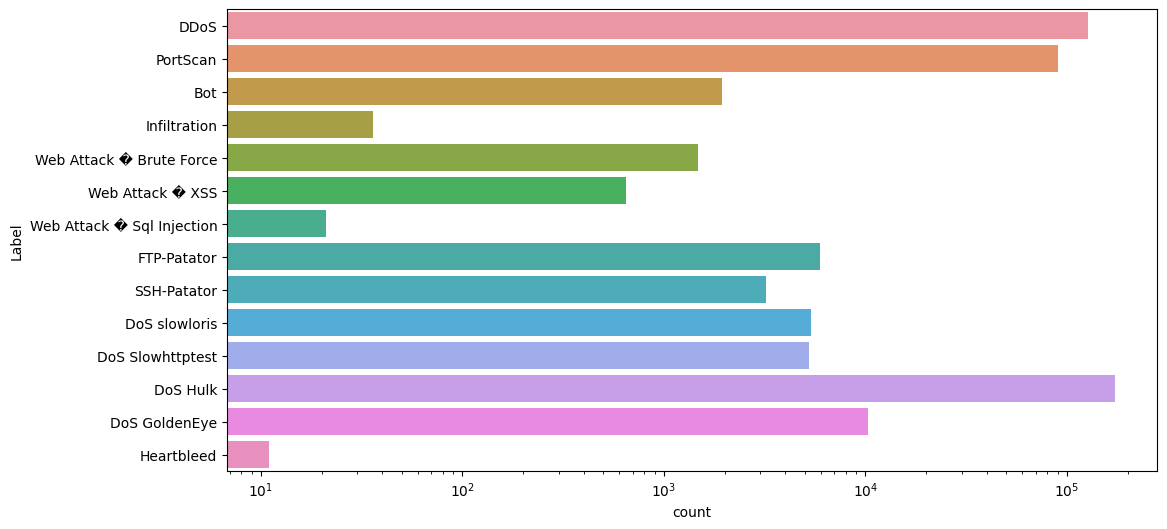

In [10]:
plt.figure(figsize=(12,6))
plot=sns.countplot(data=df['Label'],y=df['Label'].loc[df['Label']!='BENIGN'])
plt.xscale('log')
fig=plot.get_figure()
fig.savefig('img1.png')

In [11]:
# from sklearn.decomposition import PCA
# subsample_df=df.groupby('Label').apply(pd.DataFrame.sample,frac=0.1).reset_index(drop=True)
# X=subsample_df.drop(['Label'],axis=1)
# y=subsample_df['Label']

# pca=PCA(n_components=2,random_state=0)
# z=pca.fit_transform(X)

# pca_df=pd.DataFrame()
# pca_df['Label']=y
# pca_df['PCA 1']=z[:,0]
# pca_df['PCA 2']=z[:,1]

# sns.scatterplot(data=pca_df,x='PCA 1',y='PCA 2',hue='Label',palette=sns.color_palette('hls',len(pca_df.Label.value_counts()))).set_title("CICIDS2017 PCA Projection")
# plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
# plt.show()

In [12]:
# pca_df.loc[pca_df.Label !='BENIGN','Label']='ATTACK'
# sns.scatterplot(data=pca_df,x='PCA 1',y='PCA 2',hue=pca_df.Label,palette=sns.color_palette('hls',2)).set_title("CICIDS2017 Binary Class PCA Projection")
# plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
# plt.show()

In [13]:
df.columns=df.columns.str.strip().str.lower().str.replace(' ','_').str.replace('(','').str.replace(')','')
df.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [14]:
df['label'].value_counts()

label
BENIGN                        2095057
DoS Hulk                       172846
DDoS                           128014
PortScan                        90694
DoS GoldenEye                   10286
FTP-Patator                      5931
DoS slowloris                    5385
DoS Slowhttptest                 5228
SSH-Patator                      3219
Bot                              1948
Web Attack � Brute Force         1470
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64

In [15]:
new_df=df.copy()

# Considering the task as Binary Classification

In [16]:
df.loc[df['label']!='BENIGN','label']='ATTACK'
df.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [17]:
df.label.value_counts()

label
BENIGN    2095057
ATTACK     425741
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

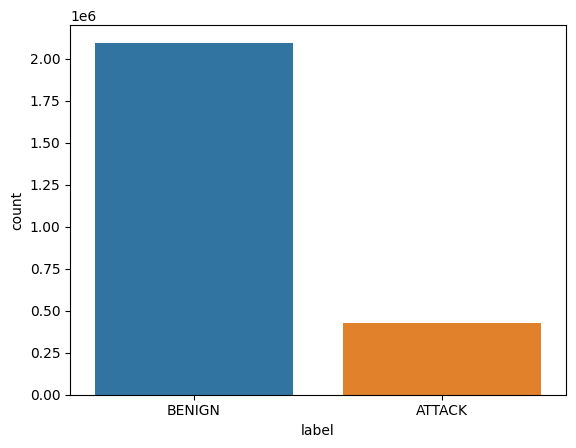

In [18]:
sns.countplot(data=df,x=df['label'])

# Balancing the dataset

In [19]:
size=len(df.loc[df.label=='ATTACK'])
print(size)
bal_df=df.groupby('label').apply(lambda x: x.sample(n=min(size,len(x))))

425741


<Axes: xlabel='label', ylabel='count'>

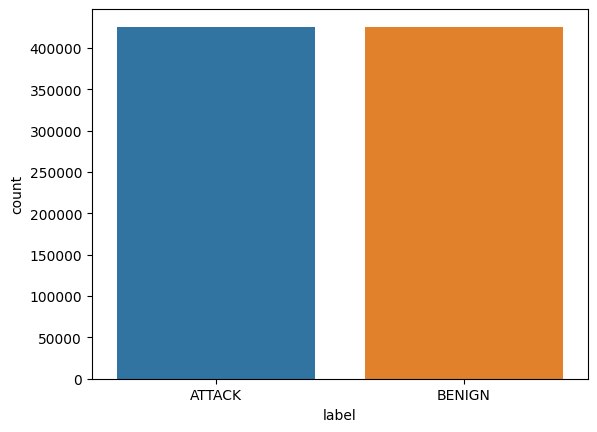

In [20]:
sns.countplot(data=bal_df,x='label')

In [21]:
bal_df.shape

(851482, 66)

In [22]:
#Clearing RAM
import gc
gc.collect()

543

In [23]:
bal_df.loc[bal_df['label']== 'ATTACK','label']=1
bal_df.loc[bal_df['label']=='BENIGN','label']=0


In [24]:
type(bal_df.label)

pandas.core.series.Series

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
X=bal_df.drop(columns='label')
y=bal_df['label'].astype('int')
X=MinMaxScaler().fit_transform(X)

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(X_train.shape," ",X_test.shape)
print(y_train.shape," ",y_test.shape)

(681185, 65)   (170297, 65)
(681185,)   (170297,)


In [27]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,f1_score,precision_score,recall_score
def classify(model):
    model.fit(X_train,y_train)
    model.score(X_test,y_test)
    y_pred=model.predict(X_test)
    print(classification_report(y_test,y_pred))
    fig=plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    cm=confusion_matrix(y_test,y_pred,normalize='true')
    sns.heatmap(cm,annot=True)
    fpr,tpr,thresholds=roc_curve(y_test,y_pred)
    plt.subplot(1,2,2)
    plt.plot(fpr,tpr,label='ROC Curve')
    plt.plot([0,1],[1,0],'k--',label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.xlim([-0.02,1])
    plt.ylim([0,1.02])
    plt.legend(loc='lower right')
    print("The Accuracy of the Model is",accuracy_score(y_test,y_pred))
    print("The Precision of the Model is",f1_score(y_test,y_pred))
    print("The Recall of the Model is",precision_score(y_test,y_pred))
    print("The F1 Score of the Model is",recall_score(y_test,y_pred))


In [28]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.ensemble import RandomForestClassifier,HistGradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,ComplementNB,BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier



# Classification without Feature Engineering

In [29]:
# classify(LogisticRegression(max_iter=3000))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     85405
           1       0.92      0.96      0.94     84892

    accuracy                           0.94    170297
   macro avg       0.94      0.94      0.94    170297
weighted avg       0.94      0.94      0.94    170297

The Accuracy of the Model is 0.9394587103707053
The Precision of the Model is 0.9405475849979241
The Recall of the Model is 0.9212529935384755
The F1 Score of the Model is 0.960667671865429


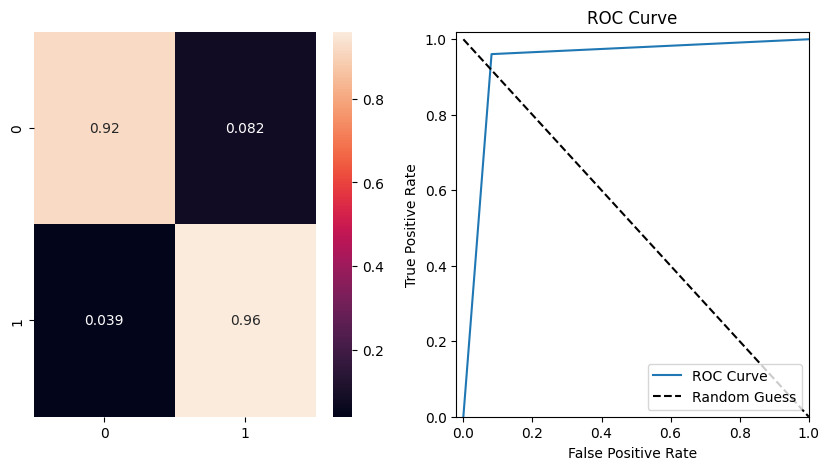

In [30]:
classify(SGDClassifier(loss='modified_huber',penalty='elasticnet',max_iter=3000))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     85405
           1       1.00      0.99      1.00     84892

    accuracy                           1.00    170297
   macro avg       1.00      1.00      1.00    170297
weighted avg       1.00      1.00      1.00    170297

The Accuracy of the Model is 0.9965237203239047
The Precision of the Model is 0.9965060966253142
The Recall of the Model is 0.9985451706763182
The F1 Score of the Model is 0.9944753333647458


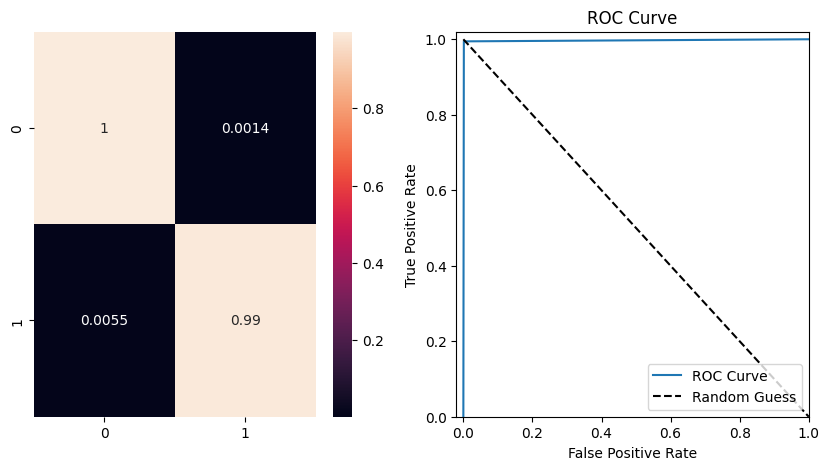

In [31]:
classify(RandomForestClassifier(max_depth=10,min_samples_split=10))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85405
           1       0.99      1.00      0.99     84892

    accuracy                           0.99    170297
   macro avg       0.99      0.99      0.99    170297
weighted avg       0.99      0.99      0.99    170297

The Accuracy of the Model is 0.991479591537138
The Precision of the Model is 0.9914954722621107
The Recall of the Model is 0.9866896865485343
The F1 Score of the Model is 0.9963483013711539


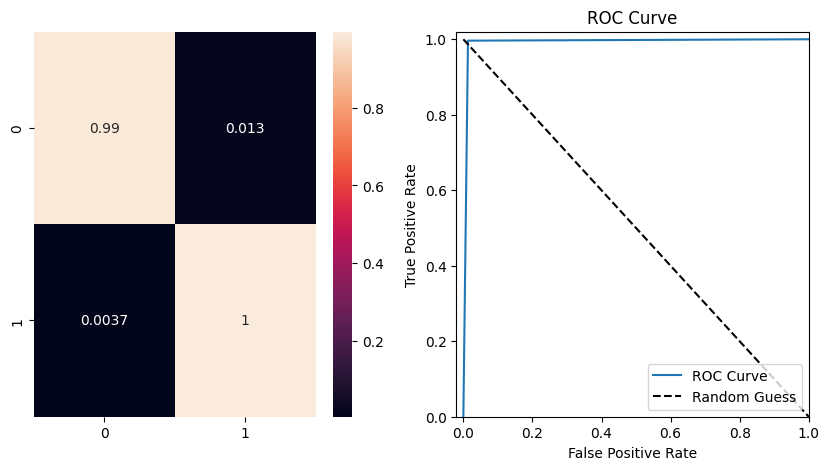

In [32]:
classify(KNeighborsClassifier())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85405
           1       1.00      1.00      1.00     84892

    accuracy                           1.00    170297
   macro avg       1.00      1.00      1.00    170297
weighted avg       1.00      1.00      1.00    170297

The Accuracy of the Model is 0.9989430230714575
The Precision of the Model is 0.99894051585106
The Recall of the Model is 0.9982941577845227
The F1 Score of the Model is 0.9995877114451303


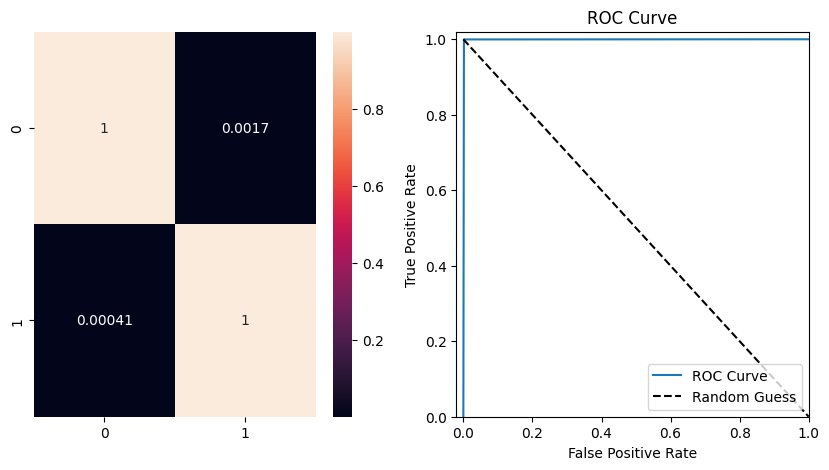

In [33]:
classify(HistGradientBoostingClassifier())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85405
           1       1.00      1.00      1.00     84892

    accuracy                           1.00    170297
   macro avg       1.00      1.00      1.00    170297
weighted avg       1.00      1.00      1.00    170297

The Accuracy of the Model is 0.9982148834095727
The Precision of the Model is 0.9982093631458662
The Recall of the Model is 0.9982799245994345
The F1 Score of the Model is 0.9981388116665881


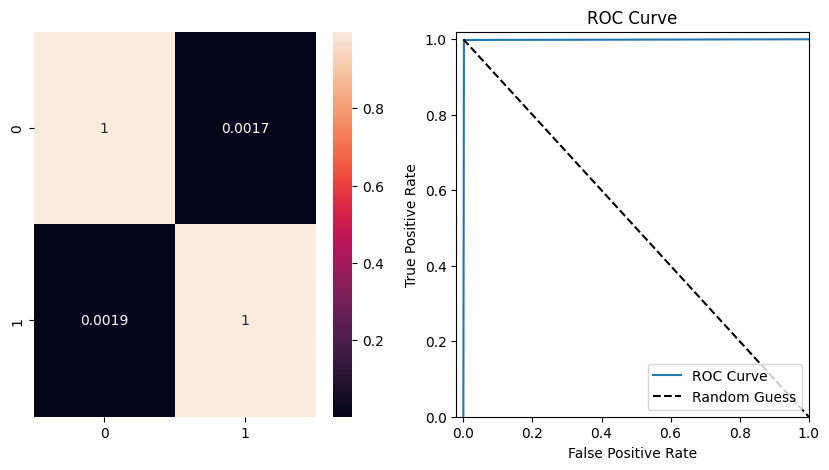

In [34]:
classify(ExtraTreesClassifier())

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     85405
           1       0.99      0.99      0.99     84892

    accuracy                           0.99    170297
   macro avg       0.99      0.99      0.99    170297
weighted avg       0.99      0.99      0.99    170297

The Accuracy of the Model is 0.9914737194430906
The Precision of the Model is 0.9914454381561738
The Recall of the Model is 0.9917375828009712
The F1 Score of the Model is 0.9911534655797956


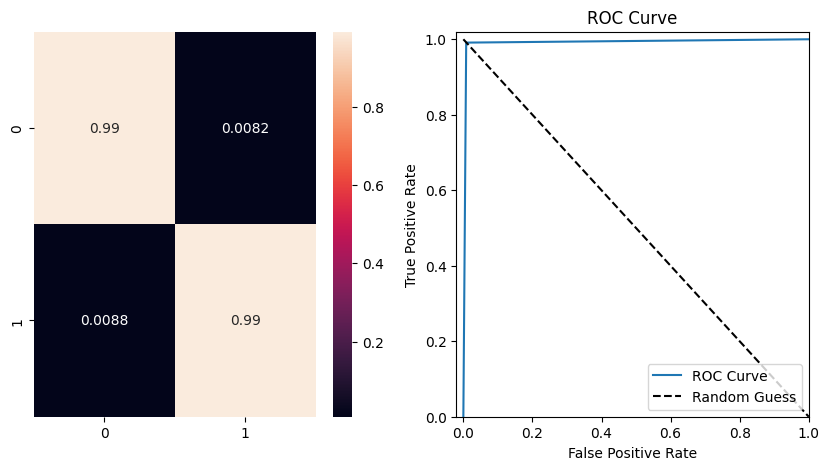

In [35]:
classify(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       0.95      0.48      0.64     85405
           1       0.65      0.98      0.78     84892

    accuracy                           0.73    170297
   macro avg       0.80      0.73      0.71    170297
weighted avg       0.80      0.73      0.71    170297

The Accuracy of the Model is 0.7264543708932042
The Precision of the Model is 0.780807995257051
The Recall of the Model is 0.6500697306360375
The F1 Score of the Model is 0.9773712481741507


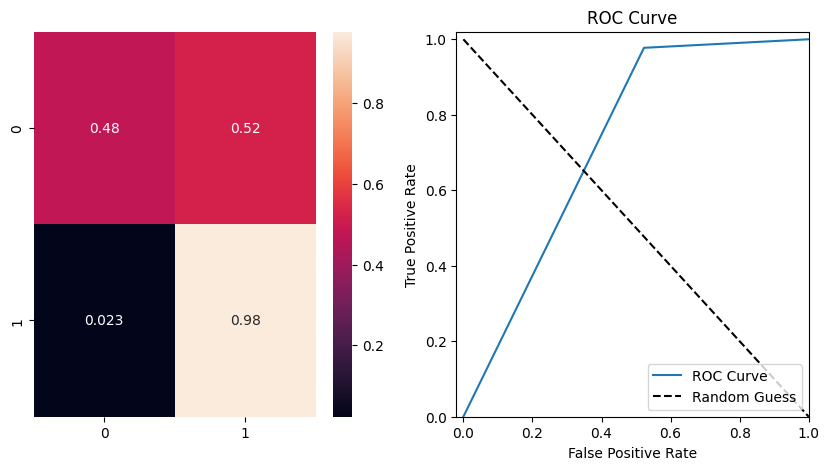

In [36]:
classify(GaussianNB())

              precision    recall  f1-score   support

           0       0.70      0.90      0.79     85405
           1       0.86      0.61      0.72     84892

    accuracy                           0.76    170297
   macro avg       0.78      0.76      0.75    170297
weighted avg       0.78      0.76      0.75    170297

The Accuracy of the Model is 0.7585512369566111
The Precision of the Model is 0.7169312533560974
The Recall of the Model is 0.8625716462909585
The F1 Score of the Model is 0.6133675729161758


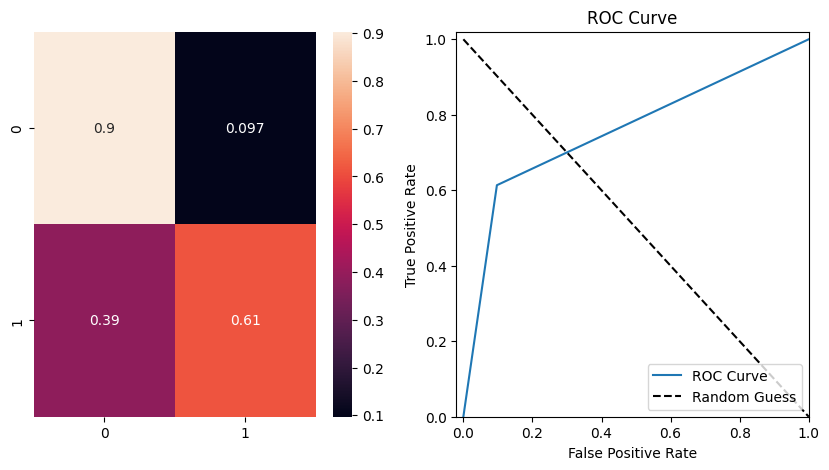

In [37]:
classify(MultinomialNB())

              precision    recall  f1-score   support

           0       0.70      0.90      0.79     85405
           1       0.86      0.61      0.72     84892

    accuracy                           0.76    170297
   macro avg       0.78      0.76      0.75    170297
weighted avg       0.78      0.76      0.75    170297

The Accuracy of the Model is 0.7585512369566111
The Precision of the Model is 0.7168727793538435
The Recall of the Model is 0.8627519225669583
The F1 Score of the Model is 0.6131908778212317


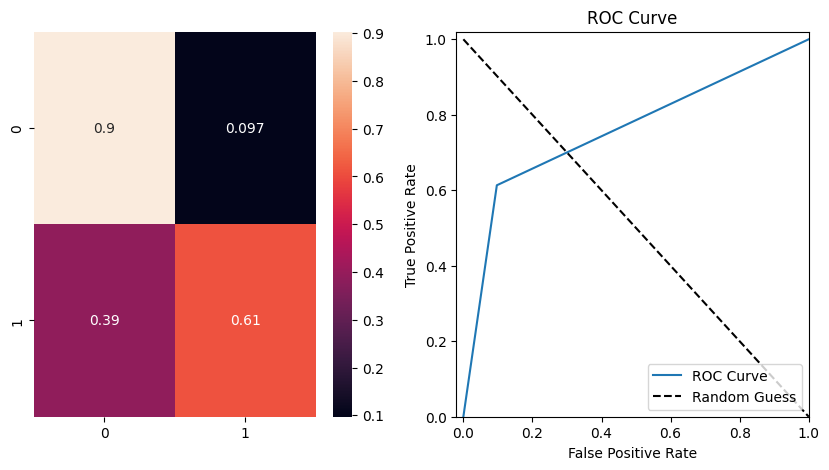

In [38]:
classify(ComplementNB())

              precision    recall  f1-score   support

           0       0.69      0.72      0.71     85405
           1       0.71      0.68      0.69     84892

    accuracy                           0.70    170297
   macro avg       0.70      0.70      0.70    170297
weighted avg       0.70      0.70      0.70    170297

The Accuracy of the Model is 0.700464482639154
The Precision of the Model is 0.693110169899408
The Recall of the Model is 0.708314888593773
The F1 Score of the Model is 0.67854450360458


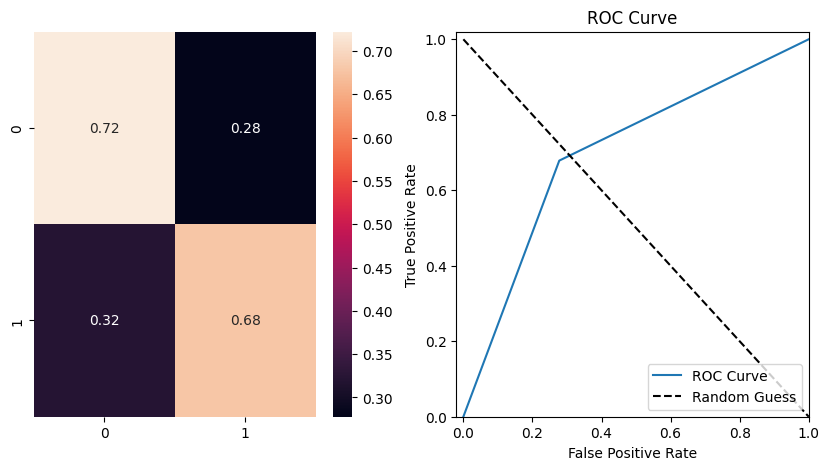

In [39]:
classify(BernoulliNB())

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     85405
           1       0.93      0.97      0.95     84892

    accuracy                           0.95    170297
   macro avg       0.95      0.95      0.95    170297
weighted avg       0.95      0.95      0.95    170297

The Accuracy of the Model is 0.9492885958061504
The Precision of the Model is 0.9500537864504414
The Recall of the Model is 0.9332038084850137
The F1 Score of the Model is 0.9675234415492626


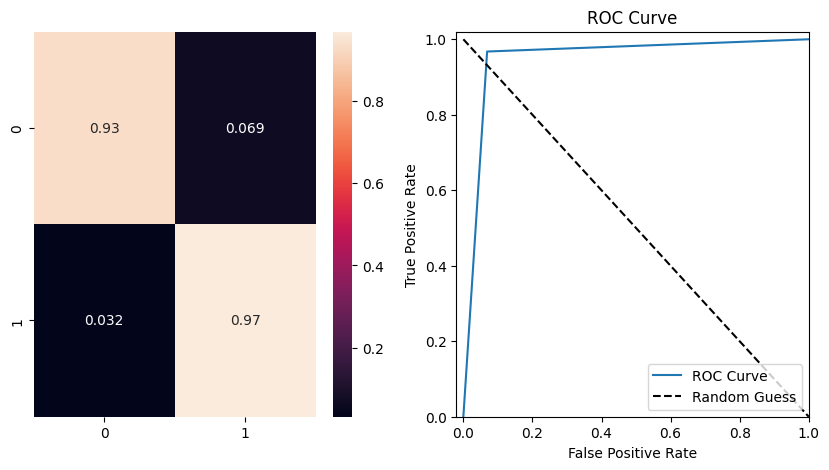

In [40]:
classify(LinearSVC())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85405
           1       1.00      1.00      1.00     84892

    accuracy                           1.00    170297
   macro avg       1.00      1.00      1.00    170297
weighted avg       1.00      1.00      1.00    170297

The Accuracy of the Model is 0.9983851741369489
The Precision of the Model is 0.9983799037368256
The Recall of the Model is 0.9986211123027424
The F1 Score of the Model is 0.9981388116665881


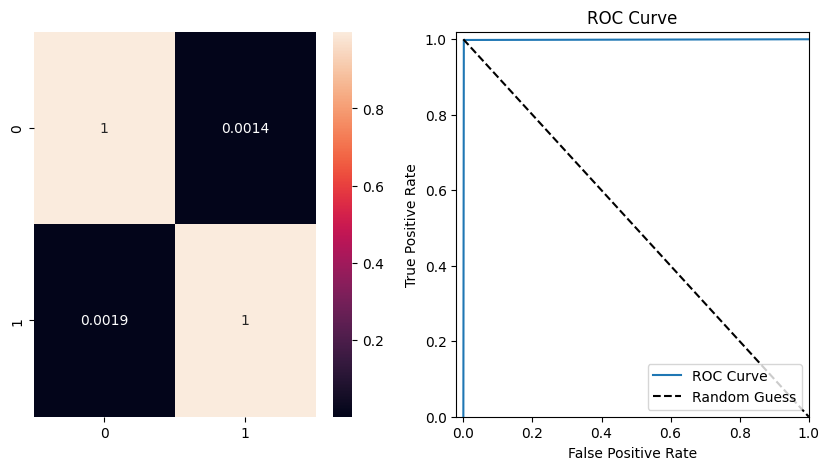

In [41]:
classify(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85405
           1       0.98      1.00      0.99     84892

    accuracy                           0.99    170297
   macro avg       0.99      0.99      0.99    170297
weighted avg       0.99      0.99      0.99    170297

The Accuracy of the Model is 0.9871812186943986
The Precision of the Model is 0.9872686872692706
The Recall of the Model is 0.9776725382616229
The F1 Score of the Model is 0.9970550817509306


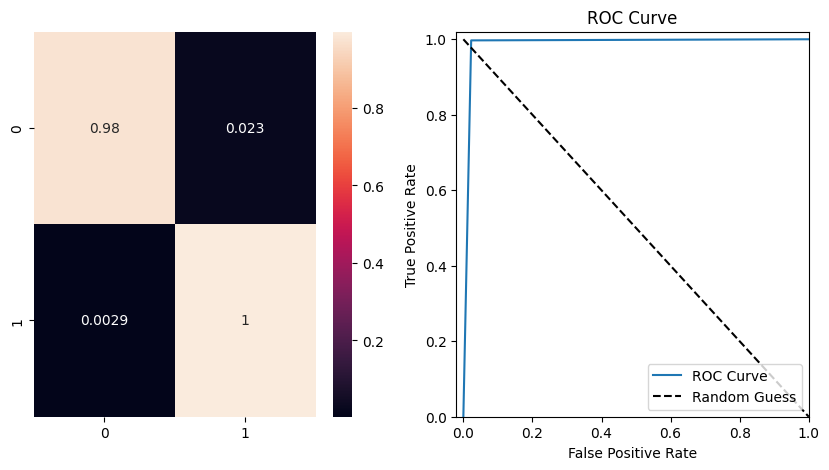

In [42]:
classify(MLPClassifier(max_iter=3000))

# Taking the Unbalanced Dataset

In [43]:
df.loc[df['label']== 'ATTACK','label']=1
df.loc[df['label']=='BENIGN','label']=0
Xu=df.drop(columns='label')
yu=df['label'].astype('int')
Xu=MinMaxScaler().fit_transform(Xu)
Xu_train,Xu_test,yu_train,yu_test=train_test_split(Xu,yu,test_size=0.2)

In [44]:
print(Xu_train.shape,yu_train.shape)
print(Xu_test.shape,yu_test.shape)

(2016638, 65) (2016638,)
(504160, 65) (504160,)


In [45]:
def classify2(model):
    model.fit(Xu_train,yu_train)
    y_pred=model.predict(Xu_test)
    print(classification_report(yu_test,y_pred))
    fig=plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    cm=confusion_matrix(yu_test,y_pred,normalize='true')
    sns.heatmap(cm,annot=True)
    fpr,tpr,thresholds=roc_curve(yu_test,y_pred)
    plt.subplot(1,2,2)
    plt.plot(fpr,tpr,label='ROC Curve')
    plt.plot([0,1],[1,0],'k--',label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.xlim([-0.02,1])
    plt.ylim([0,1.02])
    plt.legend(loc='lower right')
    print("The Accuracy of the Model is",accuracy_score(yu_test,y_pred))
    print("The Precision of the Model is",f1_score(yu_test,y_pred))
    print("The Recall of the Model is",precision_score(yu_test,y_pred))
    print("The F1 Score of the Model is",recall_score(yu_test,y_pred))


              precision    recall  f1-score   support

           0       0.97      0.97      0.97    419276
           1       0.85      0.84      0.84     84884

    accuracy                           0.95    504160
   macro avg       0.91      0.90      0.91    504160
weighted avg       0.95      0.95      0.95    504160

The Accuracy of the Model is 0.9473440971120279
The Precision of the Model is 0.8429162302735519
The Recall of the Model is 0.8467693039291446
The F1 Score of the Model is 0.8390980632392442


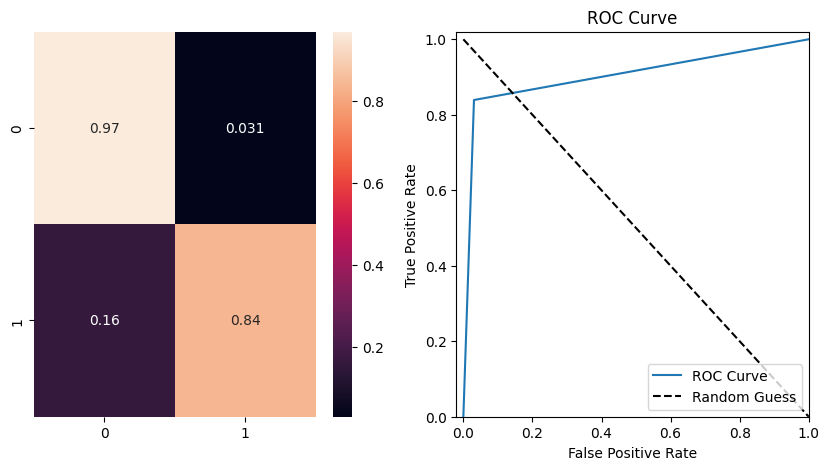

In [46]:
classify2(LogisticRegression(max_iter=3000))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96    419276
           1       0.87      0.73      0.80     84884

    accuracy                           0.94    504160
   macro avg       0.91      0.86      0.88    504160
weighted avg       0.94      0.94      0.94    504160

The Accuracy of the Model is 0.937379006664551
The Precision of the Model is 0.7977475544052736
The Recall of the Model is 0.8743206998722144
The F1 Score of the Model is 0.7335069035389473


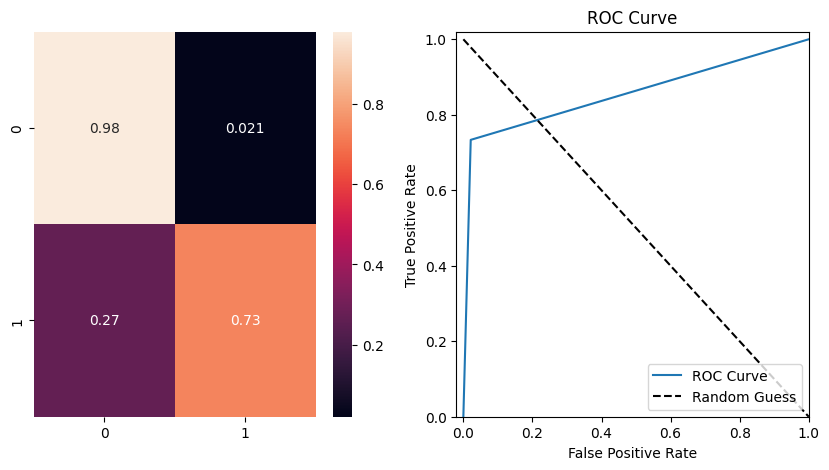

In [47]:
classify2(SGDClassifier(loss='modified_huber',penalty='elasticnet',max_iter=3000))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419276
           1       1.00      1.00      1.00     84884

    accuracy                           1.00    504160
   macro avg       1.00      1.00      1.00    504160
weighted avg       1.00      1.00      1.00    504160

The Accuracy of the Model is 0.9989170104728657
The Precision of the Model is 0.9967835051546391
The Recall of the Model is 0.9968892135837674
The F1 Score of the Model is 0.9966778191414165


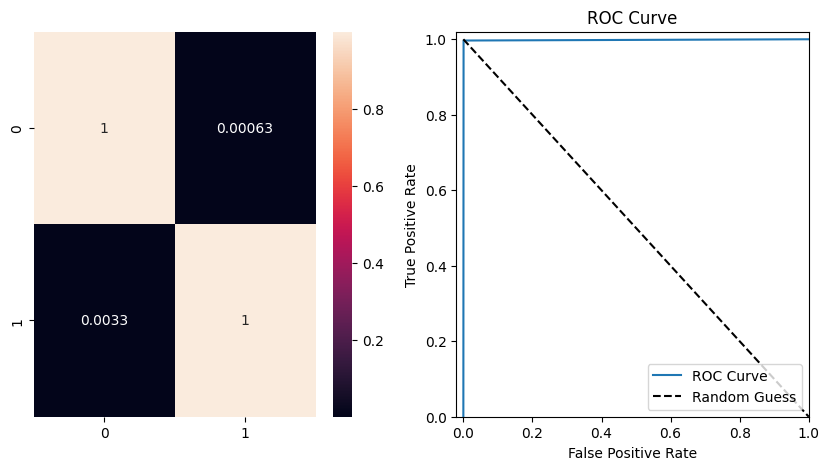

In [48]:
classify2(RandomForestClassifier(max_depth=50))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419276
           1       0.98      0.98      0.98     84884

    accuracy                           0.99    504160
   macro avg       0.99      0.99      0.99    504160
weighted avg       0.99      0.99      0.99    504160

The Accuracy of the Model is 0.9927820533164075
The Precision of the Model is 0.9785874419672015
The Recall of the Model is 0.9775578100936952
The F1 Score of the Model is 0.9796192450874134


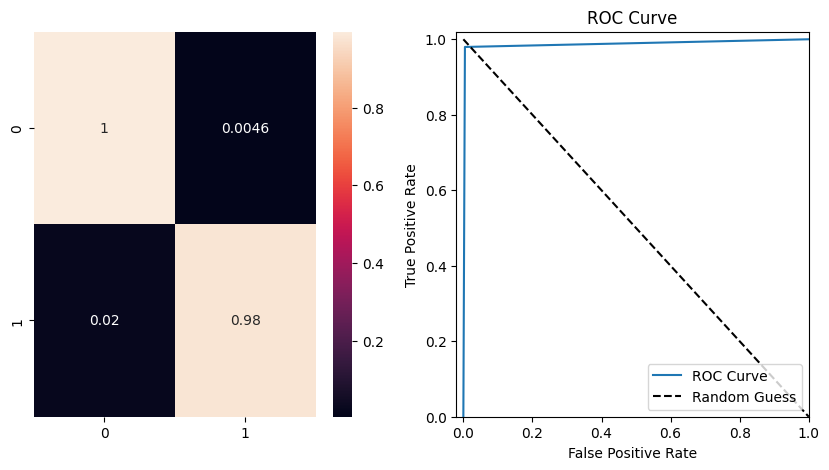

In [49]:
classify2(KNeighborsClassifier())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419276
           1       1.00      1.00      1.00     84884

    accuracy                           1.00    504160
   macro avg       1.00      1.00      1.00    504160
weighted avg       1.00      1.00      1.00    504160

The Accuracy of the Model is 0.9989308949539829
The Precision of the Model is 0.9968263688124496
The Recall of the Model is 0.9964215507398209
The F1 Score of the Model is 0.9972315159511804


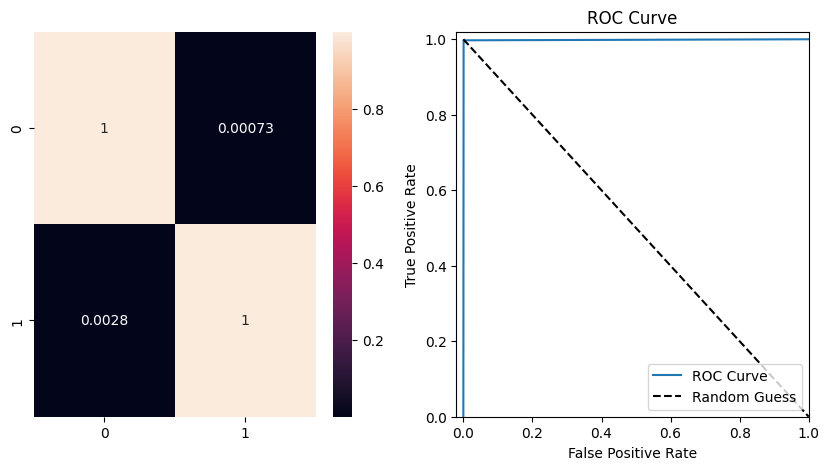

In [50]:
classify2(HistGradientBoostingClassifier())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419276
           1       0.99      0.98      0.98     84884

    accuracy                           0.99    504160
   macro avg       0.99      0.99      0.99    504160
weighted avg       0.99      0.99      0.99    504160

The Accuracy of the Model is 0.9943688511583624
The Precision of the Model is 0.9831807814212505
The Recall of the Model is 0.9888810763785439
The F1 Score of the Model is 0.9775458272465953


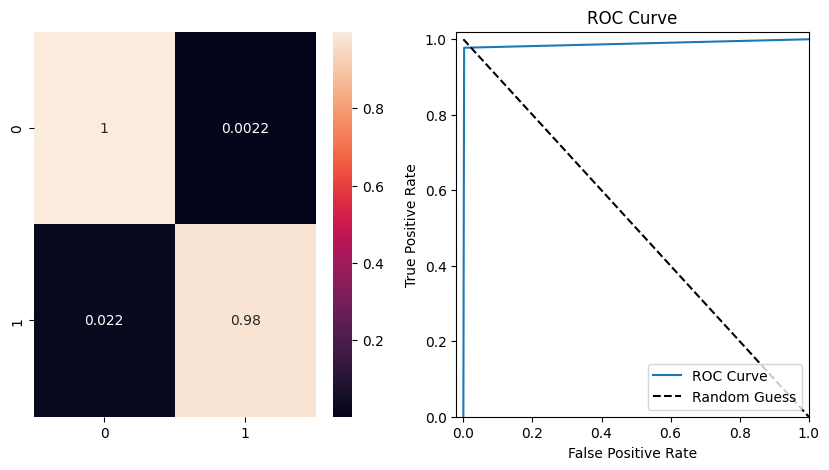

In [51]:
classify2(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419276
           1       1.00      0.99      1.00     84884

    accuracy                           1.00    504160
   macro avg       1.00      1.00      1.00    504160
weighted avg       1.00      1.00      1.00    504160

The Accuracy of the Model is 0.9983239447794351
The Precision of the Model is 0.995020243153571
The Recall of the Model is 0.9954954423782177
The F1 Score of the Model is 0.9945454973846661


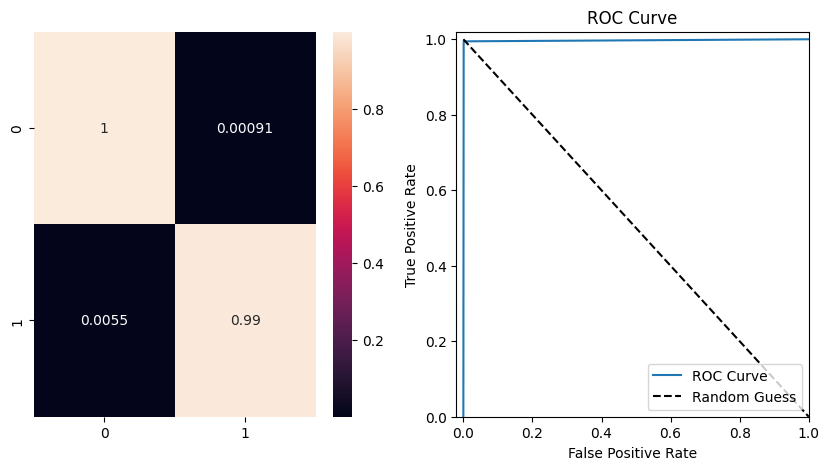

In [52]:
classify2(ExtraTreesClassifier())

              precision    recall  f1-score   support

           0       0.99      0.49      0.66    419276
           1       0.28      0.98      0.44     84884

    accuracy                           0.57    504160
   macro avg       0.64      0.74      0.55    504160
weighted avg       0.87      0.57      0.62    504160

The Accuracy of the Model is 0.5742899079657252
The Precision of the Model is 0.4360110366574695
The Recall of the Model is 0.2805936428267031
The F1 Score of the Model is 0.9773573347156119


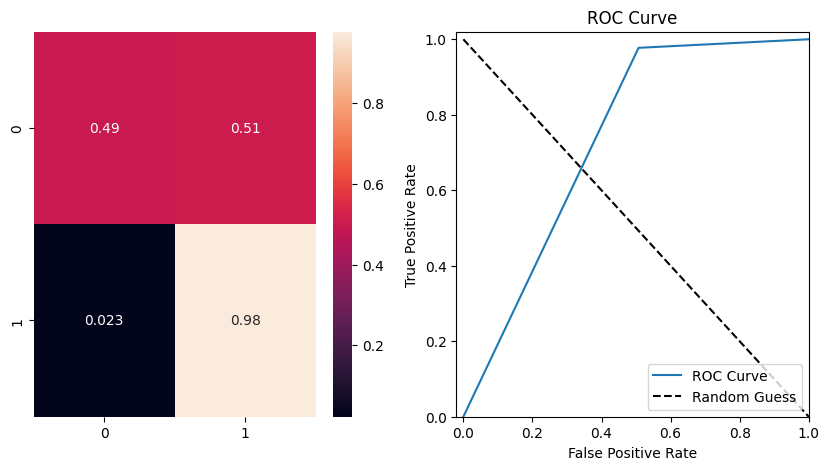

In [53]:
classify2(GaussianNB())

              precision    recall  f1-score   support

           0       0.92      0.91      0.91    419276
           1       0.57      0.61      0.59     84884

    accuracy                           0.86    504160
   macro avg       0.75      0.76      0.75    504160
weighted avg       0.86      0.86      0.86    504160

The Accuracy of the Model is 0.8569362900666455
The Precision of the Model is 0.5895414942836169
The Recall of the Model is 0.5702176377987428
The F1 Score of the Model is 0.6102210074925781


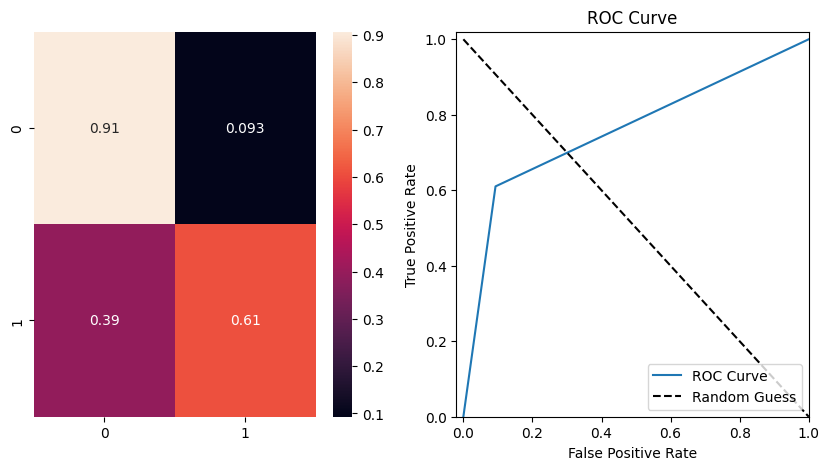

In [54]:
classify2(ComplementNB())

              precision    recall  f1-score   support

           0       0.91      0.98      0.94    419276
           1       0.83      0.54      0.66     84884

    accuracy                           0.90    504160
   macro avg       0.87      0.76      0.80    504160
weighted avg       0.90      0.90      0.90    504160

The Accuracy of the Model is 0.9046215487146938
The Precision of the Model is 0.657389990880073
The Recall of the Model is 0.8317047667123386
The F1 Score of the Model is 0.5434828707412469


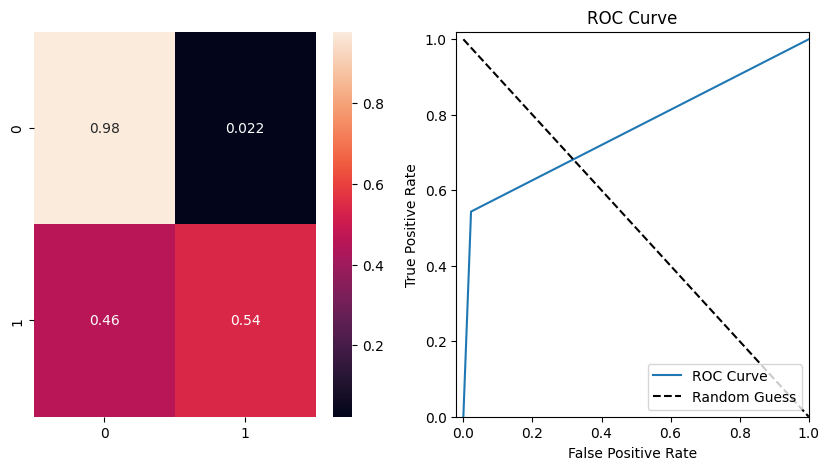

In [55]:
classify2(MultinomialNB())

              precision    recall  f1-score   support

           0       0.92      0.74      0.82    419276
           1       0.34      0.68      0.45     84884

    accuracy                           0.73    504160
   macro avg       0.63      0.71      0.64    504160
weighted avg       0.82      0.73      0.76    504160

The Accuracy of the Model is 0.727306807362742
The Precision of the Model is 0.454633085933936
The Recall of the Model is 0.3427170240124398
The F1 Score of the Model is 0.6750859997172612


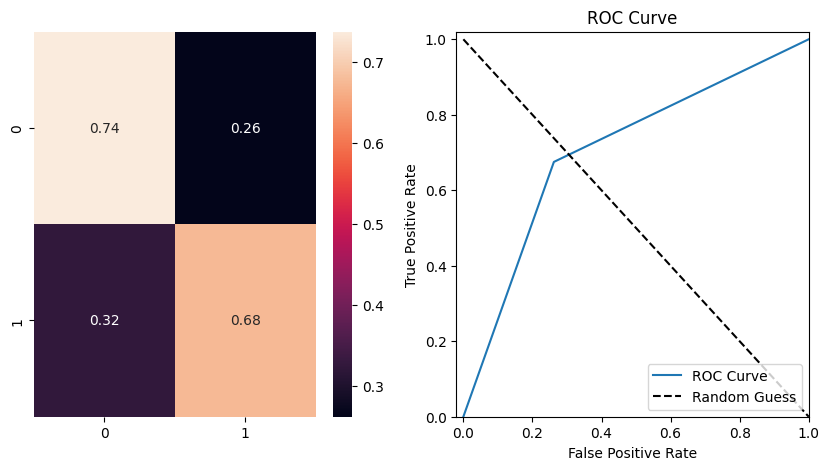

In [56]:
classify2(BernoulliNB())

              precision    recall  f1-score   support

           0       0.96      0.98      0.97    419276
           1       0.88      0.82      0.85     84884

    accuracy                           0.95    504160
   macro avg       0.92      0.90      0.91    504160
weighted avg       0.95      0.95      0.95    504160

The Accuracy of the Model is 0.9510790225325294
The Precision of the Model is 0.8497215486040871
The Recall of the Model is 0.8799944471087104
The F1 Score of the Model is 0.8214622308091042


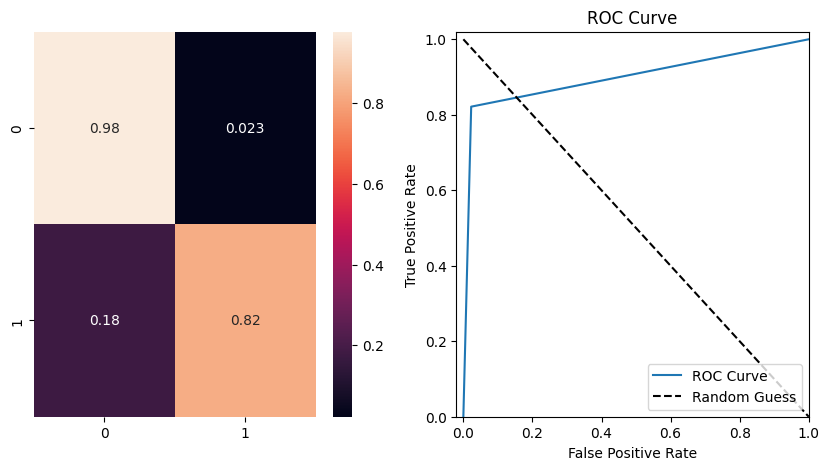

In [57]:
classify2(LinearSVC())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    419276
           1       1.00      1.00      1.00     84884

    accuracy                           1.00    504160
   macro avg       1.00      1.00      1.00    504160
weighted avg       1.00      1.00      1.00    504160

The Accuracy of the Model is 0.9984885750555379
The Precision of the Model is 0.9955094584241854
The Recall of the Model is 0.9959672664669953
The F1 Score of the Model is 0.9950520710616841


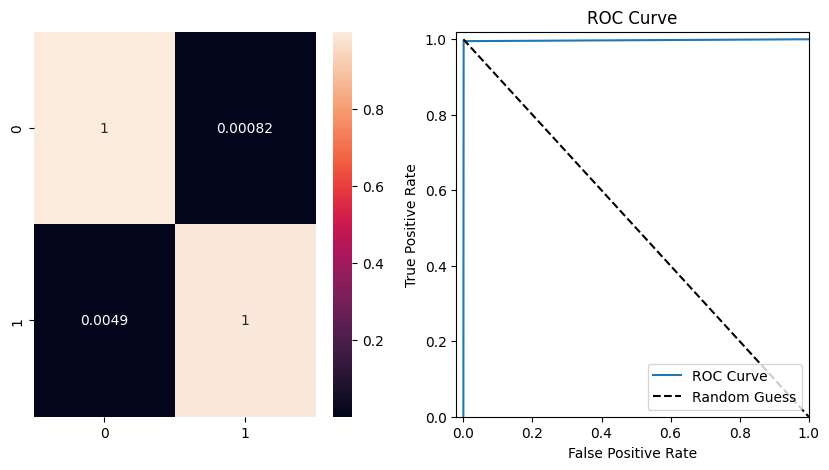

In [58]:
classify2(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    419276
           1       0.97      0.94      0.96     84884

    accuracy                           0.99    504160
   macro avg       0.98      0.97      0.97    504160
weighted avg       0.99      0.99      0.99    504160

The Accuracy of the Model is 0.9857783243414789
The Precision of the Model is 0.957028815265858
The Recall of the Model is 0.9740277167813399
The F1 Score of the Model is 0.9406130719570237


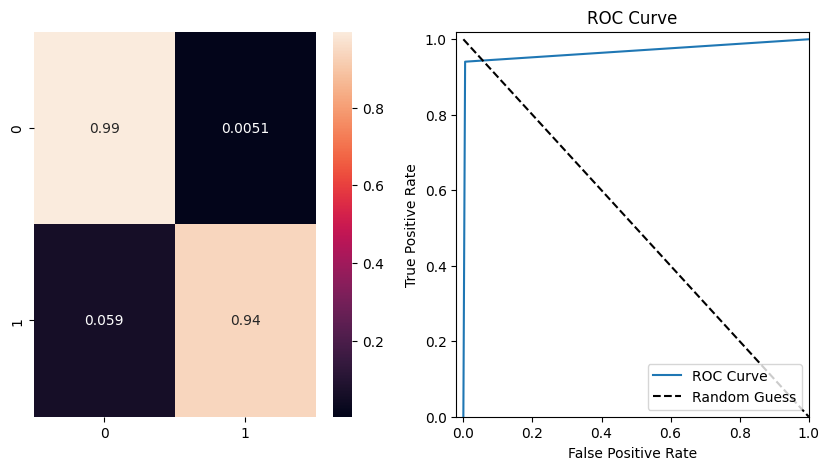

In [59]:
classify2(MLPClassifier(max_iter=3000))

# Classifying Attacks

In [60]:
new_df=new_df[new_df['label']!='BENIGN']
print(new_df.shape)

(425741, 66)


In [61]:
new_df['label'].value_counts()

label
DoS Hulk                      172846
DDoS                          128014
PortScan                       90694
DoS GoldenEye                  10286
FTP-Patator                     5931
DoS slowloris                   5385
DoS Slowhttptest                5228
SSH-Patator                     3219
Bot                             1948
Web Attack � Brute Force        1470
Web Attack � XSS                 652
Infiltration                      36
Web Attack � Sql Injection        21
Heartbleed                        11
Name: count, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
Xn=new_df.drop(columns='label')
Xn=MinMaxScaler().fit_transform(Xn)
yn=new_df['label']
yn=LabelEncoder().fit_transform(yn)
Xn_train,Xn_test,yn_train,yn_test=train_test_split(Xn,yn,test_size=0.2)

In [63]:
print(Xn_test.shape,Xn_train.shape)
print(yn_test.shape,yn_train.shape)

(85149, 65) (340592, 65)
(85149,) (340592,)


In [64]:
type(yn)

numpy.ndarray

In [65]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score
def classify3(model):
    model.fit(Xn_train,yn_train)
    y_pred=model.predict(Xn_test)
    print(classification_report(yn_test,y_pred))
    plt.figure(figsize=(15,15))
    cm=confusion_matrix(yn_test,y_pred)
    sns.heatmap(cm,annot=True)
    print("The Accuracy of the Model is",accuracy_score(yn_test,y_pred))
    print("The Precision of the Model is",f1_score(yn_test,y_pred,average='weighted'))
    print("The Recall of the Model is",precision_score(yn_test,y_pred,average='weighted'))
    print("The F1 Score of the Model is",recall_score(yn_test,y_pred,average='weighted'))

    

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      0.77      0.86       408
           1       0.98      0.99      0.99     25626
           2       0.99      0.96      0.98      2014
           3       0.99      0.99      0.99     34571
           4       0.94      0.85      0.90      1059
           5       0.85      0.88      0.87      1057
           6       0.93      1.00      0.96      1202
           7       1.00      1.00      1.00         2
           8       1.00      0.12      0.22         8
           9       0.99      1.00      1.00     18097
          10       0.92      0.97      0.95       632
          11       0.59      0.84      0.69       321
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00       147

    accuracy                           0.98     85149
   macro avg       0.80      0.74      0.74     85149
weighted avg       0.98      0.98      0.98     85149

The Accuracy of the Model

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


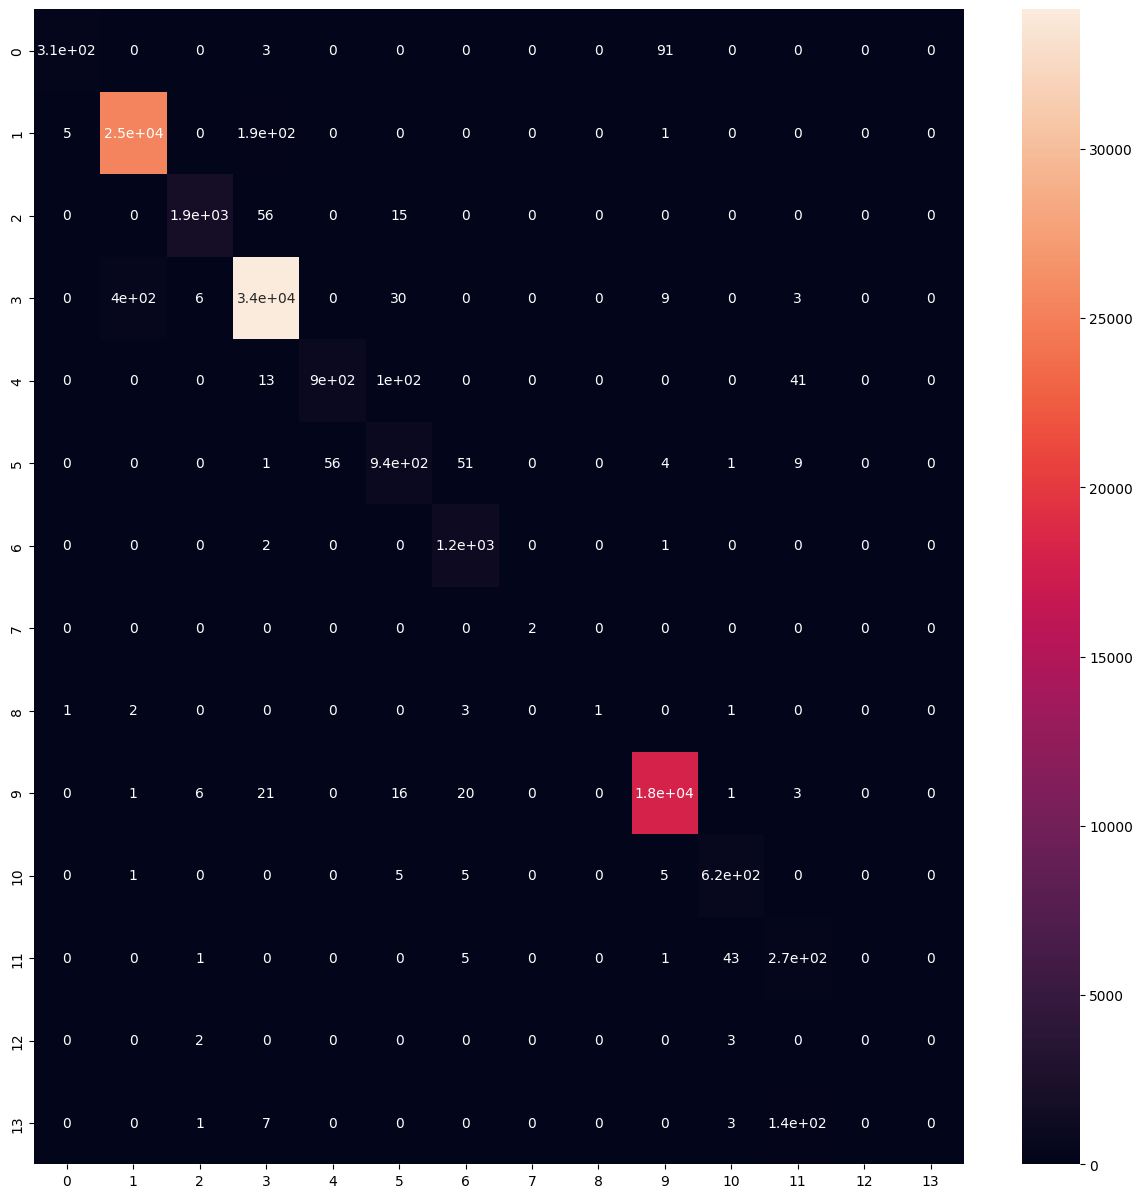

In [66]:
classify3(LogisticRegression(max_iter=3000))

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      0.75      0.85       408
           1       0.98      0.99      0.98     25626
           2       0.97      0.95      0.96      2014
           3       0.99      0.98      0.98     34571
           4       0.92      0.84      0.88      1059
           5       0.90      0.87      0.88      1057
           6       0.87      1.00      0.93      1202
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         8
           9       0.99      1.00      0.99     18097
          10       0.96      0.97      0.97       632
          11       0.62      0.84      0.71       321
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00       147

    accuracy                           0.98     85149
   macro avg       0.66      0.66      0.65     85149
weighted avg       0.98      0.98      0.98     85149

The Accuracy of the Model

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


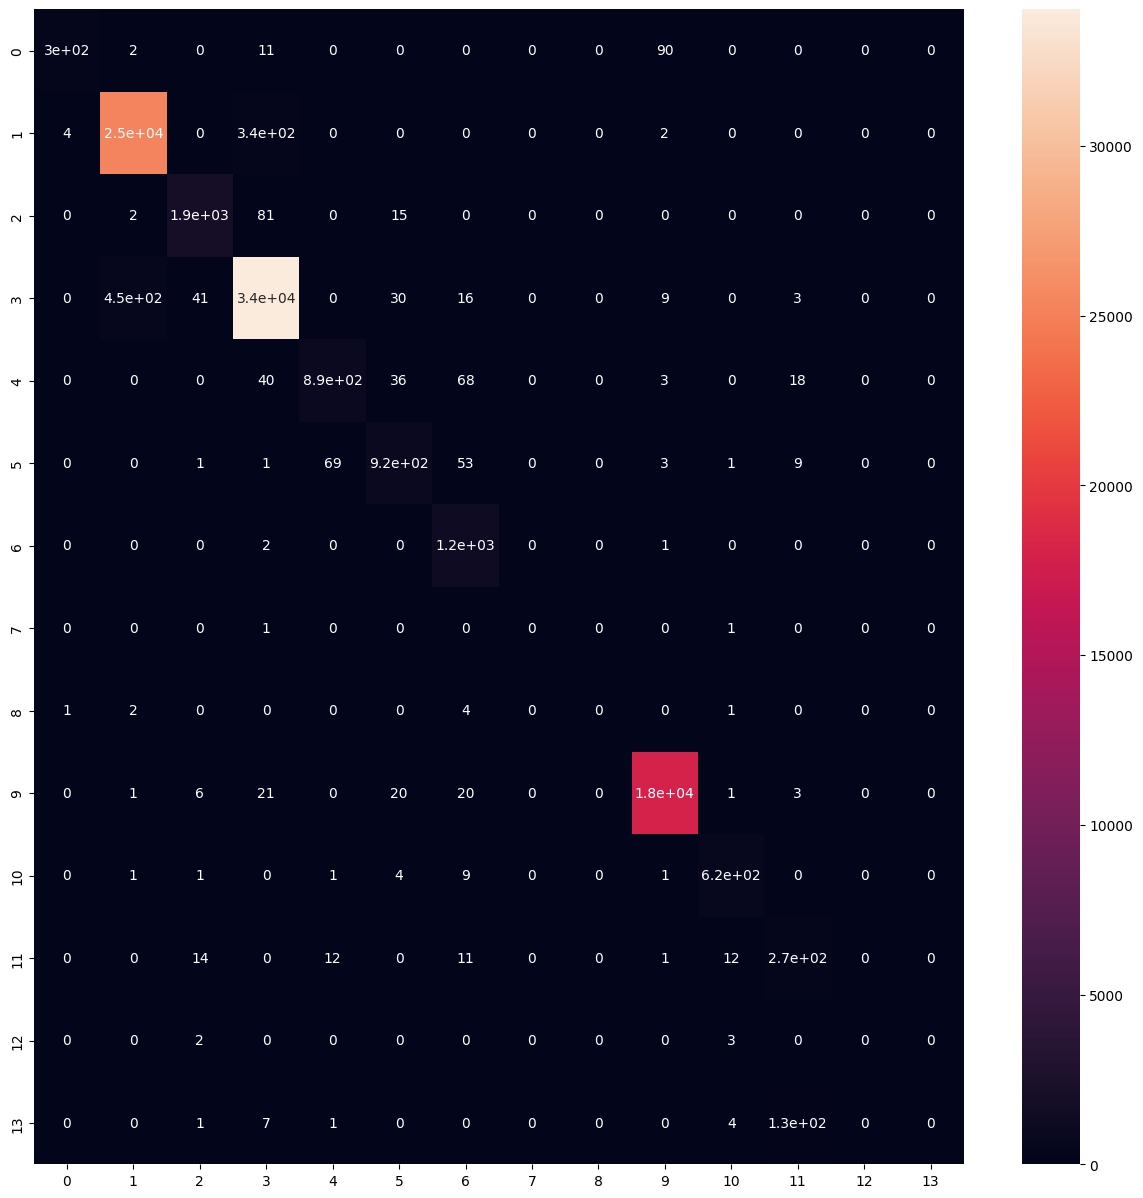

In [67]:
classify3(SGDClassifier(loss='modified_huber',penalty='elasticnet',max_iter=3000))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      1.00      1.00     25626
           2       1.00      1.00      1.00      2014
           3       1.00      1.00      1.00     34571
           4       1.00      0.99      0.99      1059
           5       0.99      0.99      0.99      1057
           6       1.00      1.00      1.00      1202
           7       1.00      1.00      1.00         2
           8       1.00      0.75      0.86         8
           9       1.00      1.00      1.00     18097
          10       1.00      1.00      1.00       632
          11       0.71      0.80      0.75       321
          12       1.00      0.20      0.33         5
          13       0.44      0.34      0.38       147

    accuracy                           1.00     85149
   macro avg       0.94      0.86      0.88     85149
weighted avg       1.00      1.00      1.00     85149

The Accuracy of the Model

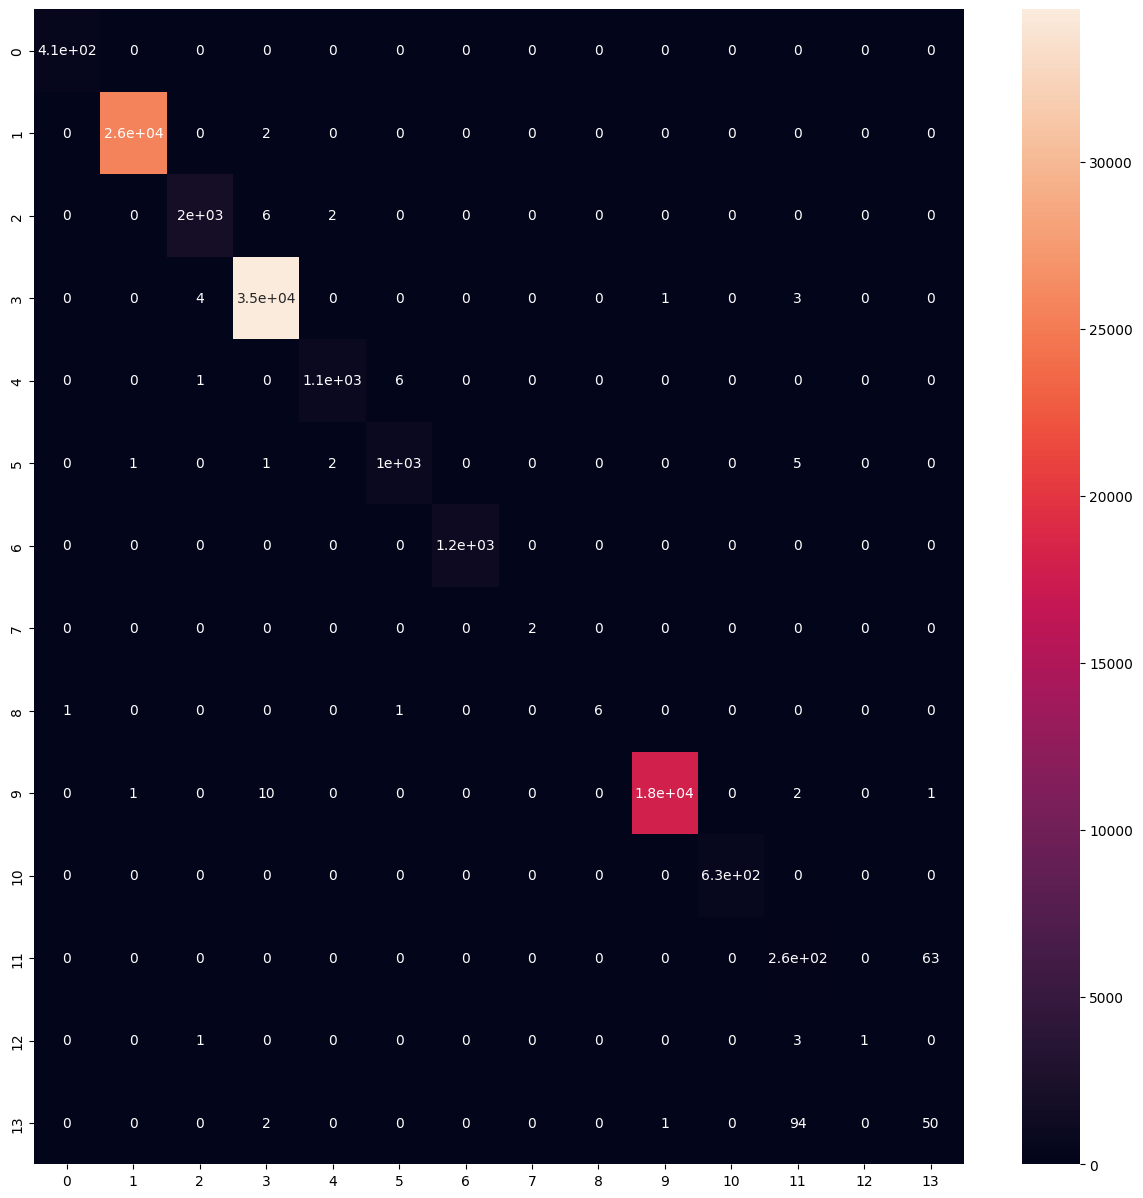

In [68]:
classify3(RandomForestClassifier())

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       408
           1       1.00      1.00      1.00     25626
           2       1.00      1.00      1.00      2014
           3       1.00      1.00      1.00     34571
           4       0.99      0.99      0.99      1059
           5       0.99      0.99      0.99      1057
           6       1.00      1.00      1.00      1202
           7       1.00      1.00      1.00         2
           8       1.00      0.50      0.67         8
           9       1.00      1.00      1.00     18097
          10       0.98      0.99      0.99       632
          11       0.72      0.80      0.76       321
          12       1.00      0.20      0.33         5
          13       0.47      0.35      0.40       147

    accuracy                           1.00     85149
   macro avg       0.94      0.84      0.87     85149
weighted avg       1.00      1.00      1.00     85149

The Accuracy of the Model

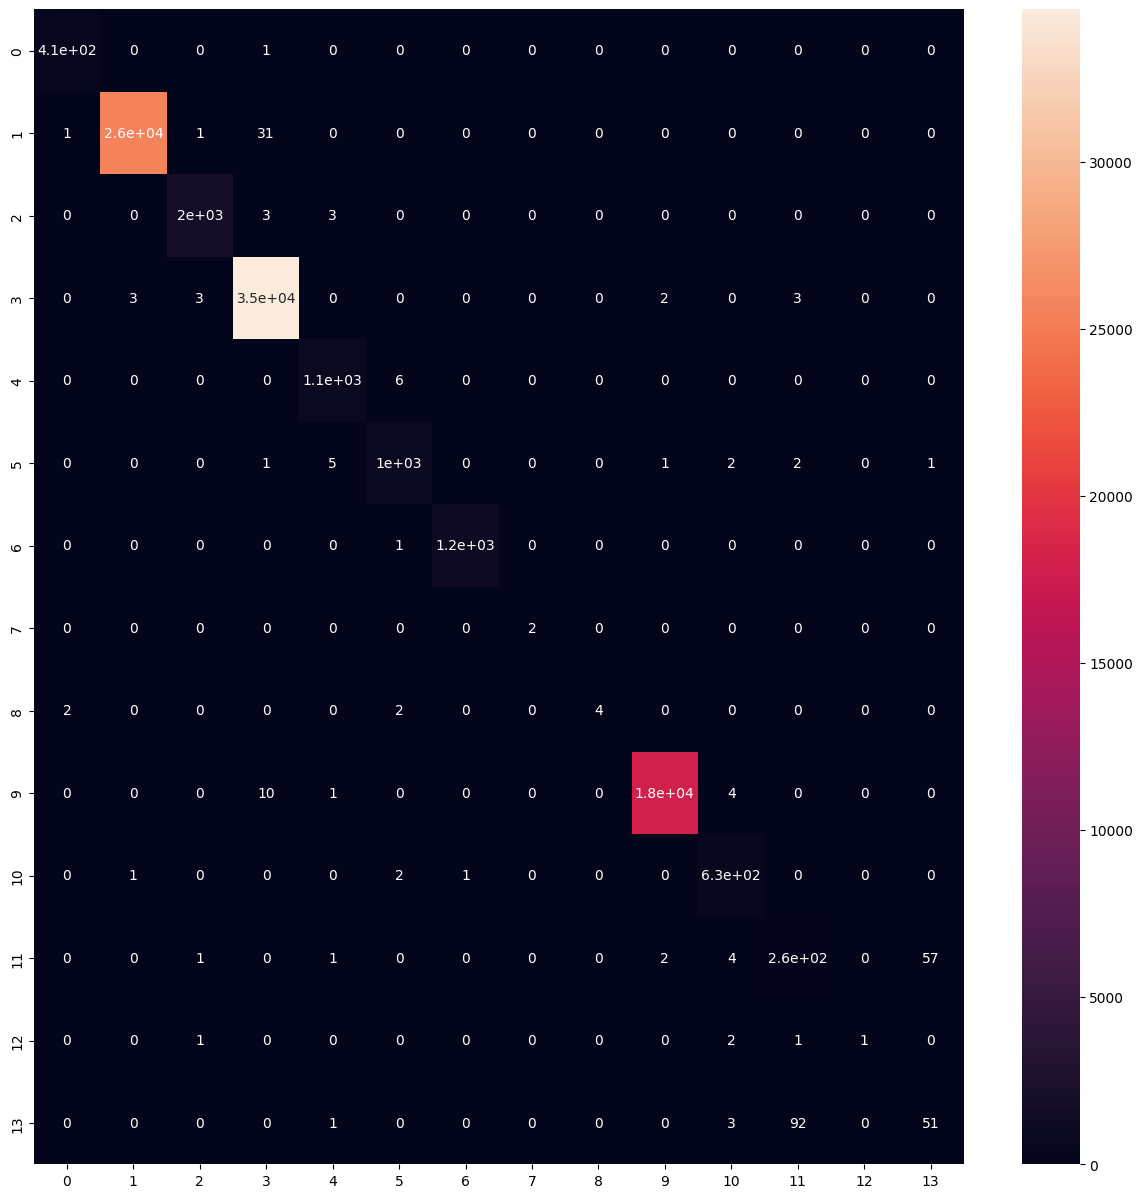

In [69]:
classify3(KNeighborsClassifier())

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       408
           1       1.00      1.00      1.00     25626
           2       0.95      0.94      0.95      2014
           3       1.00      1.00      1.00     34571
           4       0.79      0.55      0.65      1059
           5       0.85      0.54      0.66      1057
           6       0.97      0.94      0.96      1202
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         8
           9       1.00      1.00      1.00     18097
          10       0.93      0.99      0.96       632
          11       0.64      0.58      0.61       321
          12       0.00      0.00      0.00         5
          13       0.30      0.43      0.35       147

    accuracy                           0.98     85149
   macro avg       0.67      0.64      0.65     85149
weighted avg       0.99      0.98      0.98     85149

The Accuracy of the Model

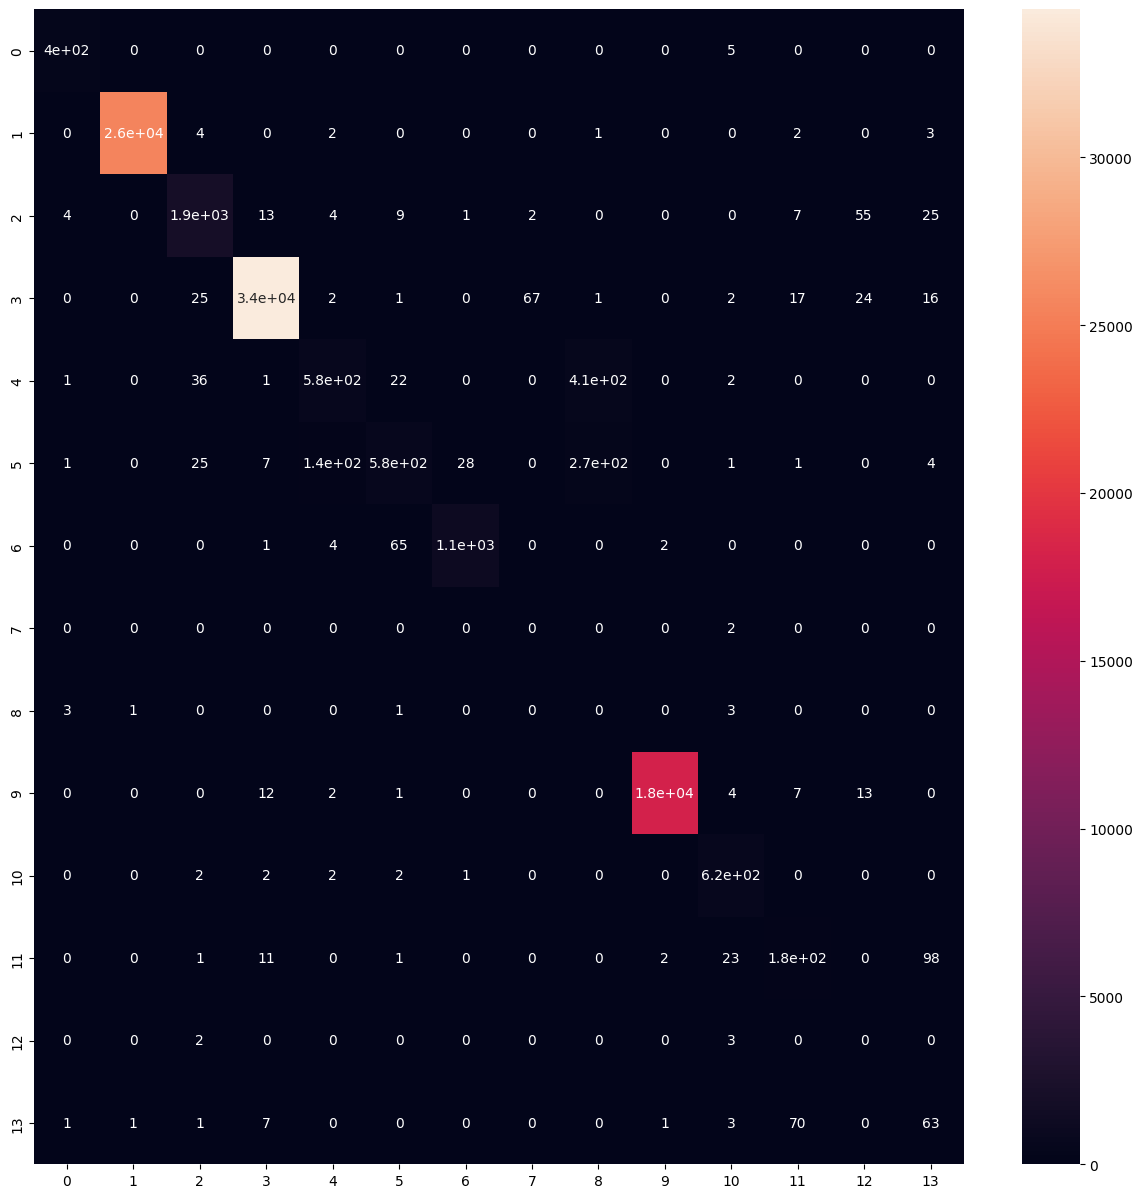

In [70]:
classify3(HistGradientBoostingClassifier())

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       408
           1       0.00      0.00      0.00     25626
           2       0.00      0.00      0.00      2014
           3       0.90      0.95      0.93     34571
           4       0.00      0.00      0.00      1059
           5       0.00      0.00      0.00      1057
           6       0.00      0.00      0.00      1202
           7       1.00      1.00      1.00         2
           8       0.00      0.00      0.00         8
           9       0.37      0.99      0.53     18097
          10       0.00      0.00      0.00       632
          11       0.00      0.00      0.00       321
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00       147

    accuracy                           0.59     85149
   macro avg       0.16      0.21      0.18     85149
weighted avg       0.44      0.59      0.49     85149

The Accuracy of the Model

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


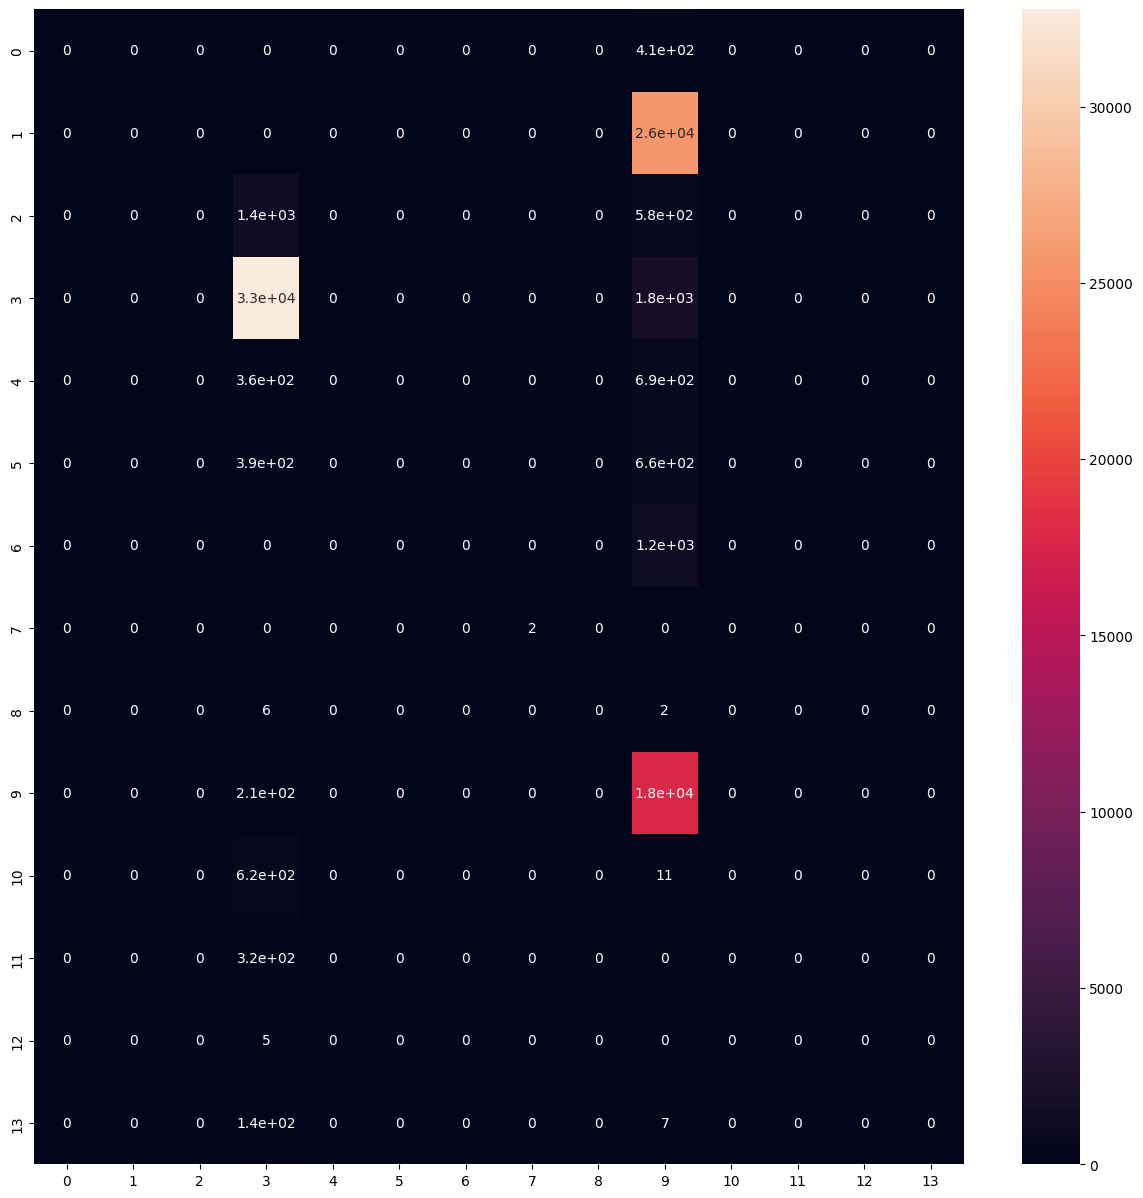

In [71]:
classify3(AdaBoostClassifier())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      1.00      1.00     25626
           2       1.00      1.00      1.00      2014
           3       1.00      1.00      1.00     34571
           4       1.00      0.99      0.99      1059
           5       0.99      0.99      0.99      1057
           6       1.00      1.00      1.00      1202
           7       1.00      1.00      1.00         2
           8       1.00      0.75      0.86         8
           9       1.00      1.00      1.00     18097
          10       1.00      1.00      1.00       632
          11       0.72      0.77      0.74       321
          12       1.00      0.40      0.57         5
          13       0.44      0.39      0.41       147

    accuracy                           1.00     85149
   macro avg       0.94      0.88      0.90     85149
weighted avg       1.00      1.00      1.00     85149

The Accuracy of the Model

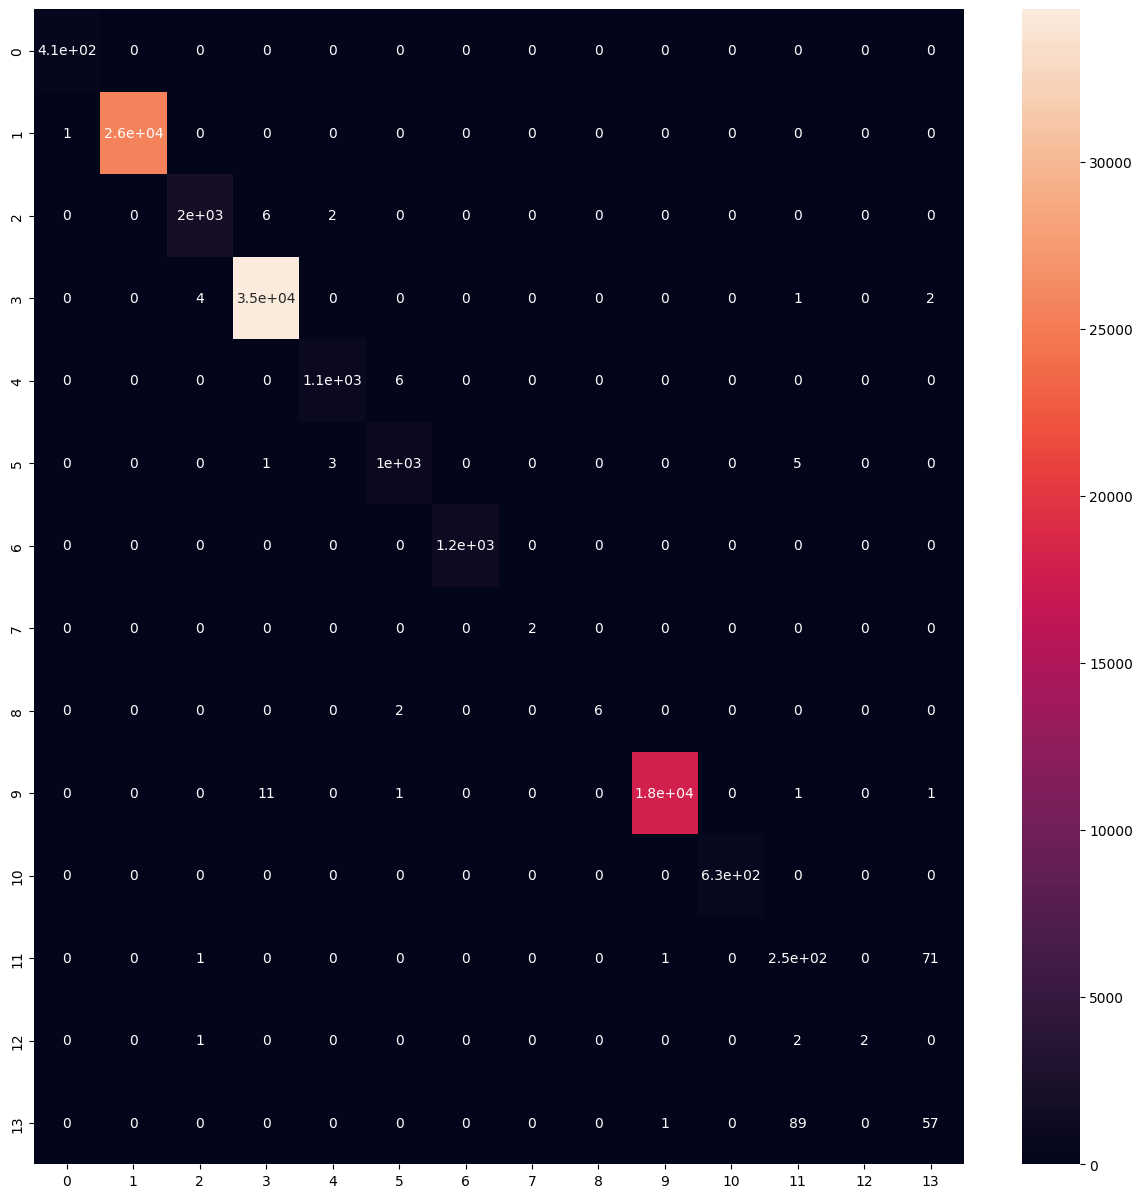

In [72]:
classify3(ExtraTreesClassifier())

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      0.77      0.87       408
           1       0.99      1.00      0.99     25626
           2       0.99      0.97      0.98      2014
           3       1.00      0.99      0.99     34571
           4       0.97      0.89      0.93      1059
           5       0.85      0.94      0.89      1057
           6       0.97      1.00      0.98      1202
           7       0.50      0.50      0.50         2
           8       1.00      0.38      0.55         8
           9       0.99      1.00      0.99     18097
          10       0.95      0.98      0.96       632
          11       0.66      0.88      0.76       321
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00       147

    accuracy                           0.99     85149
   macro avg       0.77      0.74      0.74     85149
weighted avg       0.99      0.99      0.99     85149

The Accuracy of the Model

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


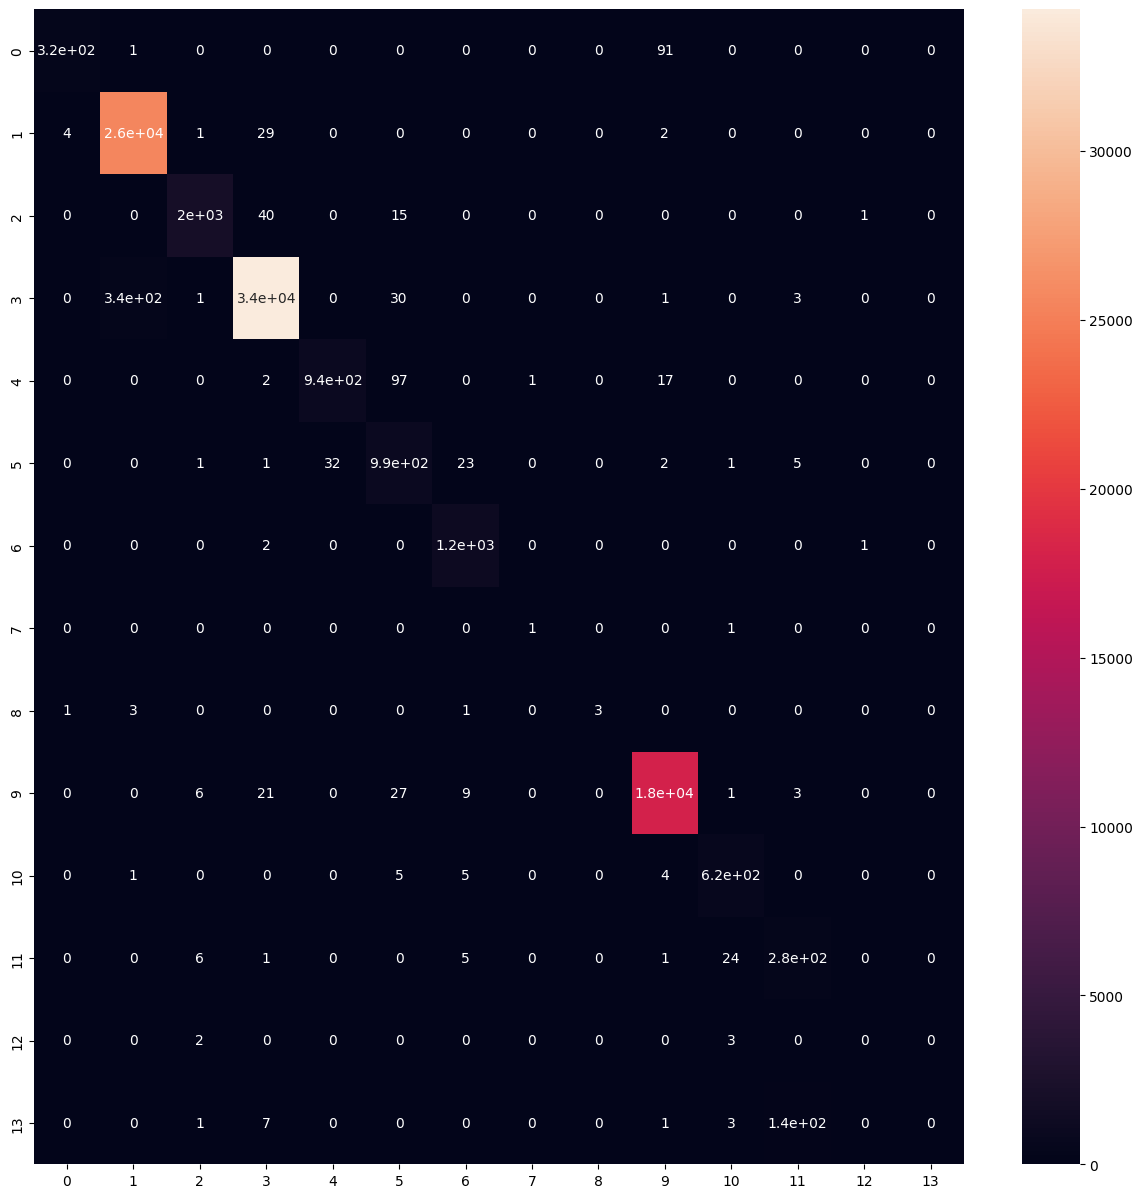

In [73]:
classify3(LinearSVC())

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      1.00      1.00     25626
           2       1.00      0.99      1.00      2014
           3       1.00      1.00      1.00     34571
           4       0.99      0.99      0.99      1059
           5       0.99      0.97      0.98      1057
           6       0.99      1.00      0.99      1202
           7       1.00      1.00      1.00         2
           8       1.00      0.75      0.86         8
           9       1.00      1.00      1.00     18097
          10       0.95      0.99      0.97       632
          11       0.67      0.79      0.73       321
          12       0.00      0.00      0.00         5
          13       0.24      0.11      0.15       147

    accuracy                           1.00     85149
   macro avg       0.84      0.83      0.83     85149
weighted avg       1.00      1.00      1.00     85149

The Accuracy of the Model

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


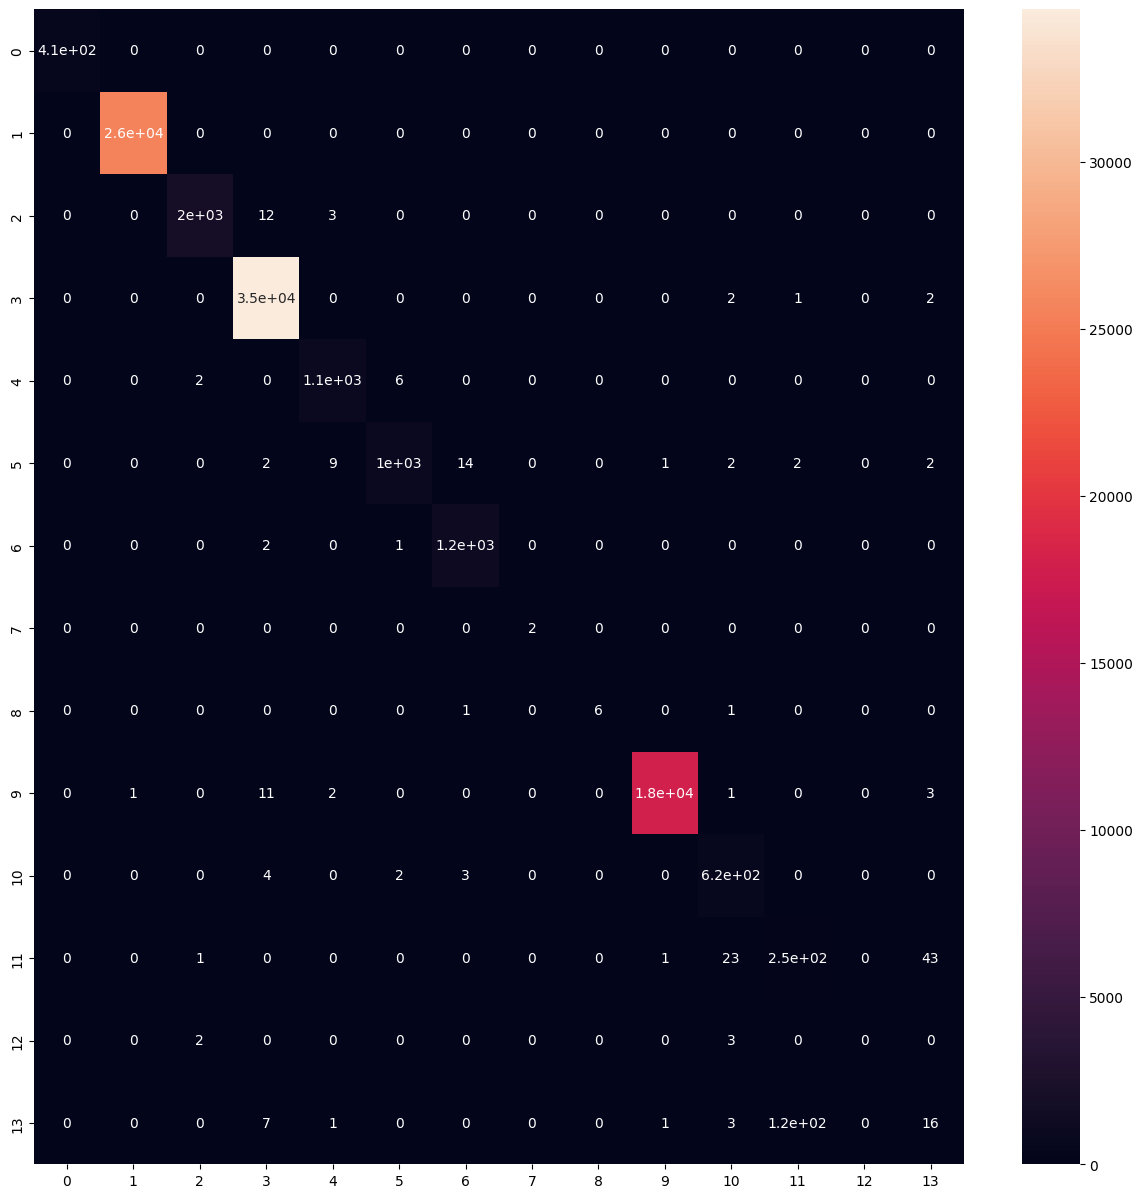

In [74]:
classify3(MLPClassifier(max_iter=3000))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       408
           1       1.00      1.00      1.00     25626
           2       1.00      1.00      1.00      2014
           3       1.00      1.00      1.00     34571
           4       0.99      0.99      0.99      1059
           5       0.99      0.99      0.99      1057
           6       1.00      1.00      1.00      1202
           7       0.67      1.00      0.80         2
           8       1.00      0.88      0.93         8
           9       1.00      1.00      1.00     18097
          10       1.00      1.00      1.00       632
          11       0.75      0.75      0.75       321
          12       0.50      0.60      0.55         5
          13       0.46      0.46      0.46       147

    accuracy                           1.00     85149
   macro avg       0.88      0.90      0.89     85149
weighted avg       1.00      1.00      1.00     85149

The Accuracy of the Model

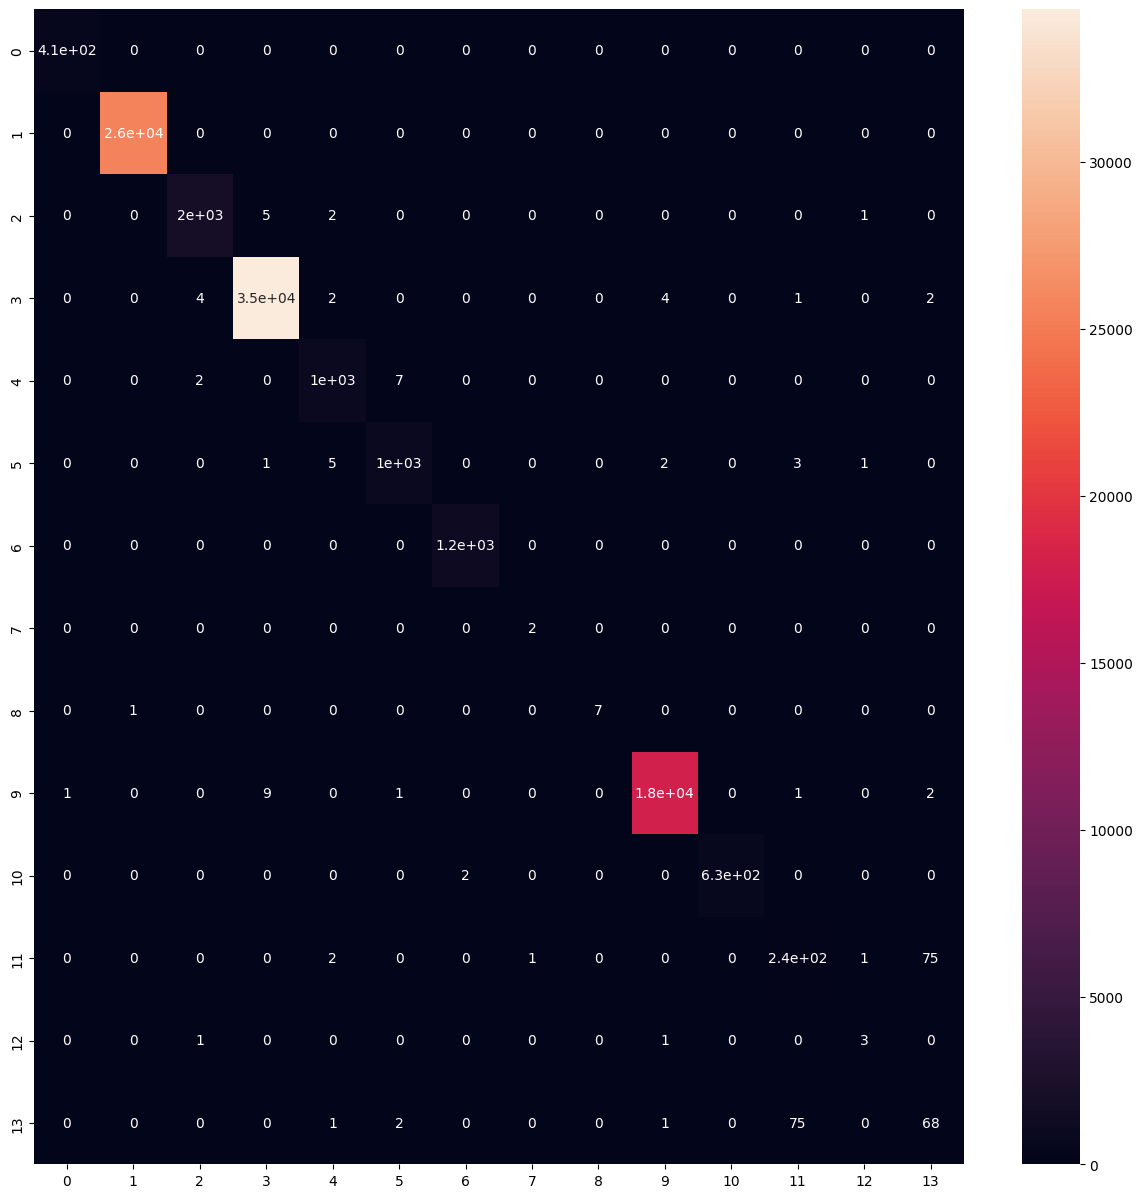

In [75]:
classify3(DecisionTreeClassifier())

              precision    recall  f1-score   support

           0       0.19      1.00      0.32       408
           1       1.00      0.96      0.98     25626
           2       0.48      0.95      0.64      2014
           3       1.00      0.88      0.94     34571
           4       0.94      0.64      0.76      1059
           5       0.70      0.92      0.80      1057
           6       0.99      1.00      0.99      1202
           7       1.00      1.00      1.00         2
           8       0.54      0.88      0.67         8
           9       1.00      0.99      0.99     18097
          10       1.00      0.93      0.96       632
          11       0.01      0.06      0.02       321
          12       0.01      1.00      0.03         5
          13       0.32      0.92      0.48       147

    accuracy                           0.93     85149
   macro avg       0.66      0.86      0.68     85149
weighted avg       0.97      0.93      0.94     85149

The Accuracy of the Model

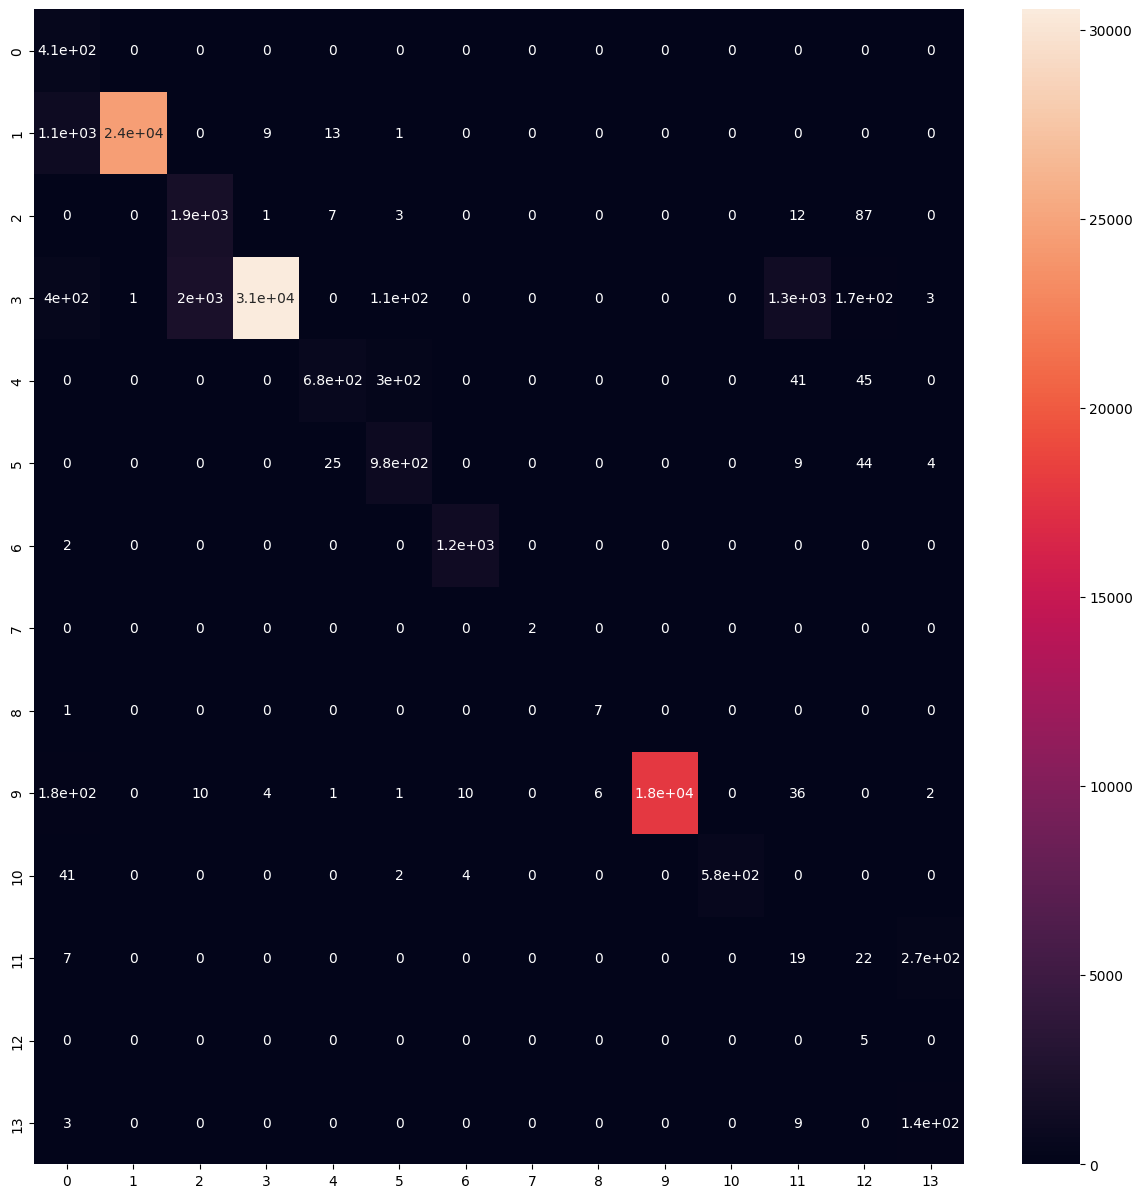

In [76]:
classify3(GaussianNB())

              precision    recall  f1-score   support

           0       0.55      0.65      0.60       408
           1       0.90      0.36      0.52     25626
           2       0.54      0.03      0.07      2014
           3       0.82      0.84      0.83     34571
           4       0.24      0.61      0.35      1059
           5       0.87      0.21      0.34      1057
           6       0.66      0.30      0.41      1202
           7       0.33      1.00      0.50         2
           8       0.83      0.62      0.71         8
           9       1.00      0.98      0.99     18097
          10       0.04      0.93      0.07       632
          11       0.12      0.07      0.09       321
          12       0.00      0.00      0.00         5
          13       0.16      0.91      0.27       147

    accuracy                           0.69     85149
   macro avg       0.50      0.54      0.41     85149
weighted avg       0.86      0.69      0.72     85149

The Accuracy of the Model

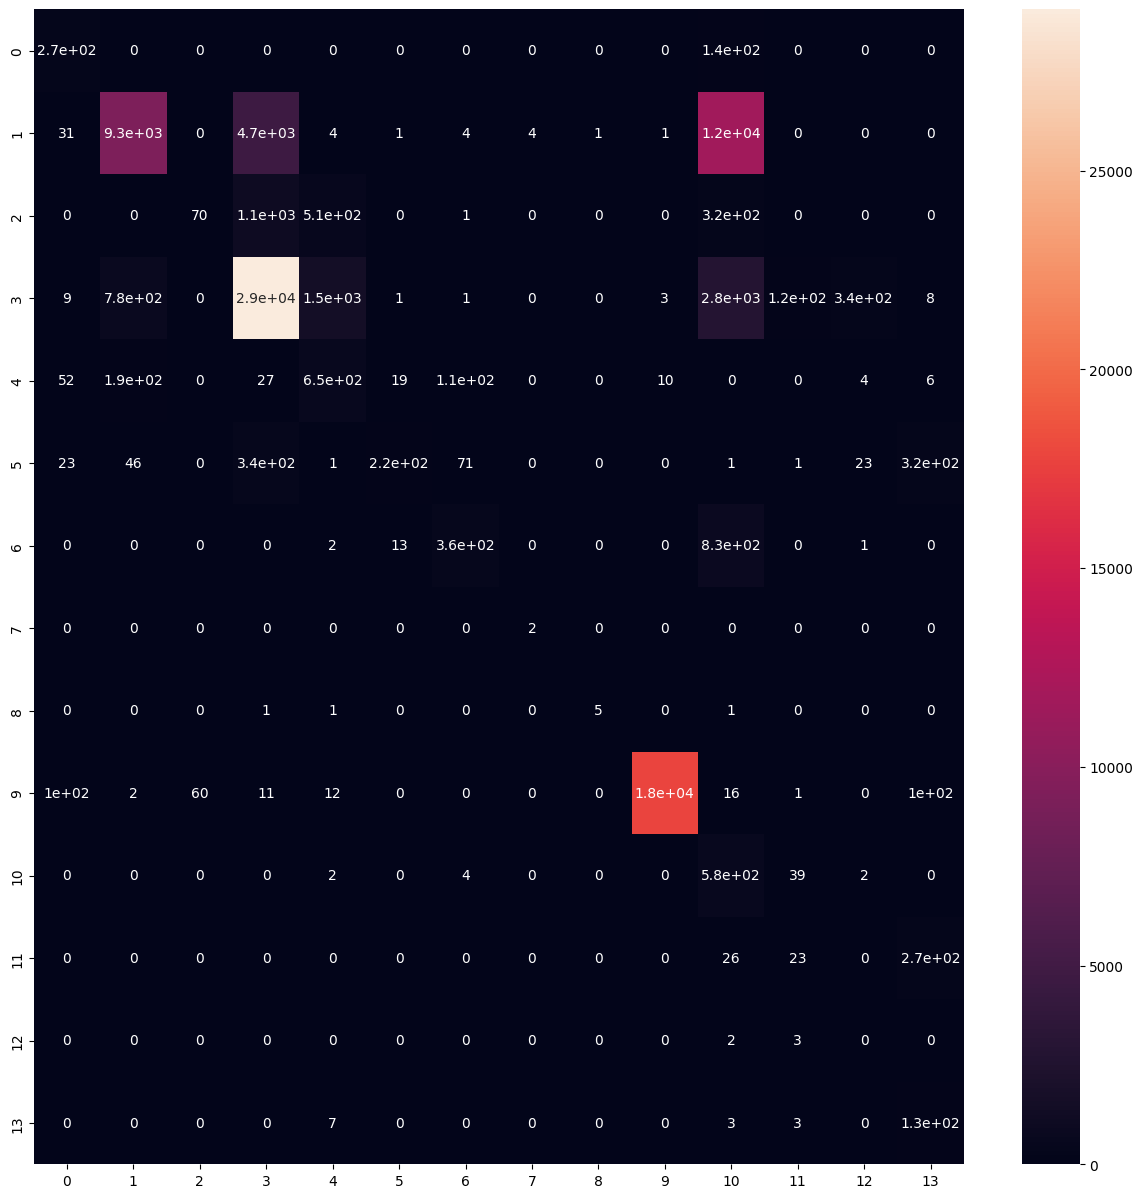

In [77]:
classify3(BernoulliNB())

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.18      0.09      0.12       408
           1       0.83      0.73      0.78     25626
           2       0.98      0.14      0.25      2014
           3       0.79      0.86      0.83     34571
           4       0.99      0.06      0.12      1059
           5       0.52      0.03      0.05      1057
           6       0.75      0.31      0.44      1202
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         8
           9       0.77      1.00      0.87     18097
          10       0.00      0.00      0.00       632
          11       0.00      0.00      0.00       321
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00       147

    accuracy                           0.79     85149
   macro avg       0.41      0.23      0.25     85149
weighted avg       0.79      0.79      0.77     85149

The Accuracy of the Model

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


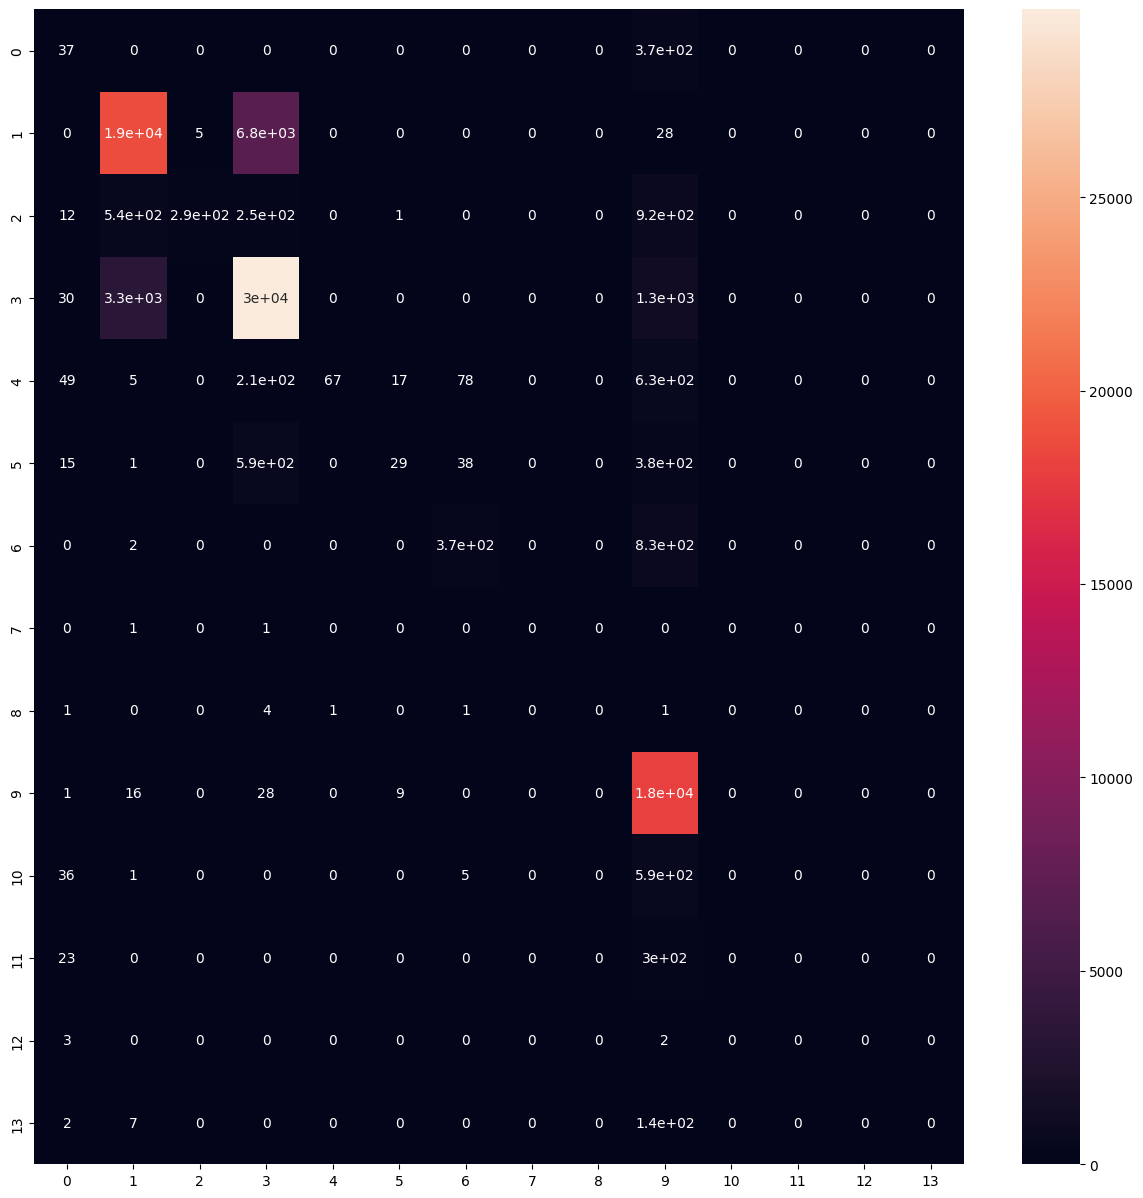

In [78]:
classify3(ComplementNB())

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.49      0.43      0.46       408
           1       0.76      0.76      0.76     25626
           2       0.97      0.19      0.32      2014
           3       0.83      0.86      0.85     34571
           4       0.93      0.80      0.86      1059
           5       0.69      0.55      0.61      1057
           6       0.87      0.31      0.46      1202
           7       1.00      1.00      1.00         2
           8       1.00      0.12      0.22         8
           9       0.90      1.00      0.94     18097
          10       0.00      0.00      0.00       632
          11       0.61      0.84      0.71       321
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00       147

    accuracy                           0.82     85149
   macro avg       0.65      0.49      0.51     85149
weighted avg       0.82      0.82      0.81     85149

The Accuracy of the Model

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


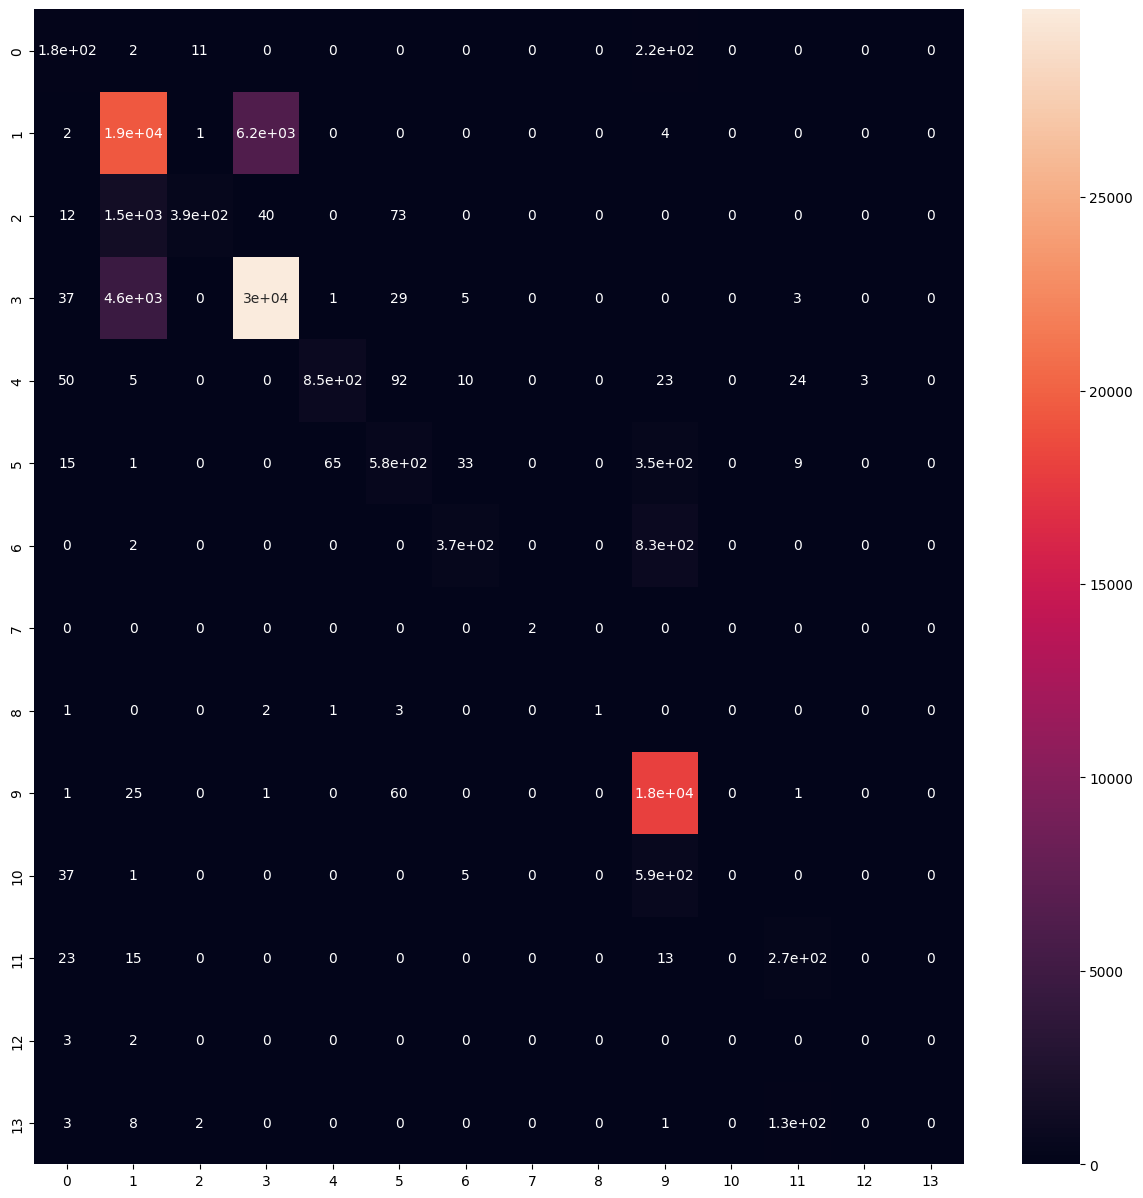

In [79]:
classify3(MultinomialNB())

# Autoencoders

In [80]:
# from keras.layers import Input,Dense
# from keras.models import Model
# from tensorflow.keras.utils import plot_model

# input_data=Input(shape=(65,))
# encoded=Dense(32,activation='relu')(input_data)
# decoded=Dense(65,activation='sigmoid')(encoded)

# autoencoder=Model(input_data,decoded)
# autoencoder.compile(optimizer='adadelta',loss='binary_crossentropy')
# plot_model(autoencoder,show_shapes=True)

# encoder=Model(input_data,encoded)
# decoder_layer=autoencoder.layers[-1]
# decoder=Model(i,decoded_layer(encoded_input))

In [81]:
# history=autoencoder.fit(Xn_train,Xn_train,epochs=50,batch_size=64,validation_data=(x_test,x_test),verbose=1)
# # encoded_data=encoder.predict(x_test)
# decoded_data=decoder.preddict(encoded_data)

In [82]:
# plt.plot(history.history['loss'],label='train')
# plt.plot(history.history['val_loss'],label='test')
# plt.legend()
# plt.show()

In [83]:
# plt.plot(history.history['accuracy'],label='train')
# plt.plot(history.history['val_accuracy'],label='test')
# plt.legend()
# plt.show()

# Designing A Deep Learning Model for Attack Classification in Second Layer

In [84]:
# # model=keras.Sequential([keras.layers.Dense(units=32,activation='relu',input_shape=(X_train.shape[-1],)),keras.layers.Dropout(0.3),keras.layers.Dense(units=16,activation='relu'),keras.layers.Dense(units=1,activation='sigmoid'),])
# initial_weights=model.get_weights()

In [85]:
# print(model.summary())

In [86]:
# plot_model(model,show_shapes=True)

In [87]:
# lr=0.001
# model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr),loss='categorical_crossentropy',metrics=['accuracy'])
# # history=model.fit()